### What is Image Resolution?

Imagine a mosaic made of tiny colored squares. Each square is a "pixel," the smallest piece of a picture. Just like more pieces in a mosaic make the picture clearer, more pixels in an image make it more detailed. 

### Pixels: Tiny Dots in a Picture

- **Pixel:** It's like a tiny dot in your image. Lots of pixels together make up your photo or digital image.
- **Image Size in Pixels:** It's the number of pixels in width and height. For example, "1024x768" means 1024 pixels wide and 768 pixels tall.

### DPI and PPI

- **DPI (Dots Per Inch):** Imagine you’re printing a photo. DPI tells you how many dots of ink or color will be printed per inch. More dots mean a clearer picture, but it uses more ink.
- **PPI (Pixels Per Inch):** This is for screens, like your phone or computer. It tells how many pixels are in one inch of the screen. More pixels mean a clearer image.

### Example

- A photo on your phone might be 2000x3000 pixels. It means the photo is 2000 pixels wide and 3000 pixels tall. If you zoom in, you'll see it gets pixelated (blocky) because you're looking at individual pixels!

### Python Code to Check Image Resolution

Here's a simple Python code to find out how many pixels are in an image:

```python
from PIL import Image

def check_resolution(image_path):
    with Image.open(image_path) as img:
        return img.size  # This will give width and height

# Example: Replace 'your_image.jpg' with your image file's name
resolution = check_resolution('your_image.jpg')
print("The image is", resolution[0], "pixels wide and", resolution[1], "pixels tall.")
```

This code uses a library called `PIL` (Python Imaging Library) to look at your image and tell you its size in pixels.

### Why Does Resolution Matter?

- **High Resolution:** More pixels mean more detail. Great for big prints or high-quality screens. But the file size is bigger, so it takes more space on your computer or phone.
- **Low Resolution:** Fewer pixels mean less detail. It’s good for quick loading on websites or small screens. But if you make it too big, it looks blurry or blocky.

### Key Points

1. **Resolution is about detail:** More pixels = more detail.
2. **High resolution isn't always necessary:** Sometimes, a smaller file is more practical.
3. **Different uses:** High resolution for printing and quality displays, lower for web use.

In [1]:
from PIL import Image

def analyze_image_resolution(image_path):
    with Image.open(image_path) as img:
        width, height = img.size
        resolution = width * height
        print(f"Image Width: {width} pixels")
        print(f"Image Height: {height} pixels")
        print(f"Total Pixels: {resolution}")

        if resolution > 2000000:
            print("This is a high-resolution image, good for print.")
        elif resolution > 500000:
            print("This image is suitable for web use.")
        else:
            print("This image has low resolution, best for small web graphics.")

# Replace 'path_to_image.jpg' with the path to your image file
analyze_image_resolution('c130.jpg')


Image Width: 970 pixels
Image Height: 728 pixels
Total Pixels: 706160
This image is suitable for web use.



### Explanation of the Code

1. **Importing the Library:** We start by importing the `Image` class from the `PIL` module. PIL is a library that allows us to work with images in Python.

2. **Defining a Function:** `analyze_image_resolution` is a function we've created. It takes one argument, `image_path`, which is the location of the image file you want to analyze.

3. **Opening the Image:** The `with Image.open(image_path) as img:` line opens the image file. The `with` statement is used for resource management; it ensures the file is properly closed after its suite finishes.

4. **Getting Image Size:** `width, height = img.size` retrieves the width and height of the image in pixels.

5. **Calculating Total Pixels:** We calculate the total number of pixels by multiplying the width and height.

6. **Print Statements:** These lines print the width, height, and total pixels of the image to the console.

7. **Resolution Analysis:** The `if-elif-else` block categorizes the image based on its total pixel count:
   - More than 2 million pixels is considered high-resolution, typically good for print.
   - Between 500,000 and 2 million pixels is suitable for web use.
   - Below 500,000 pixels is considered low resolution, best for small web graphics.

8. **Using the Function:** Finally, the function `analyze_image_resolution` is called with the path of the image file that needs to be analyzed.



# Resizing Image

In [3]:
from PIL import Image

def resize_image(input_image_path, output_image_path, size):
    with Image.open(input_image_path) as image:
        resized_image = image.resize(size)
        resized_image.save(output_image_path)

# Example Usage
resize_image('c130.jpg', 'c130_resized_image.jpg', (800, 600))




### Explanation of the Code

1. **Importing the Library:** We start by importing the `Image` class from the `PIL` (Python Imaging Library) module. This library provides easy-to-use image processing capabilities.

2. **Defining the Resize Function:** `resize_image` is a function that takes three arguments: `input_image_path` (the path to the original image file), `output_image_path` (the path where the resized image will be saved), and `size` (a tuple defining the new size of the image in pixels, e.g., (800, 600)).

3. **Opening the Original Image:** `with Image.open(input_image_path) as image:` opens the image file from the specified path. The `with` statement ensures that the file is properly handled and closed after its block of code runs.

4. **Resizing the Image:** `resized_image = image.resize(size)` resizes the image to the dimensions specified in the `size` tuple.

5. **Saving the Resized Image:** `resized_image.save(output_image_path)` saves the resized image to the path specified in `output_image_path`.

6. **Example Usage:** The function is then called with the paths to the original and output images, and the desired size. For example, `resize_image('path_to_original_image.jpg', 'path_to_resized_image.jpg', (800, 600))` will resize the image to 800 pixels wide and 600 pixels tall.



# Image Scaling, Upscaling and Downscaling

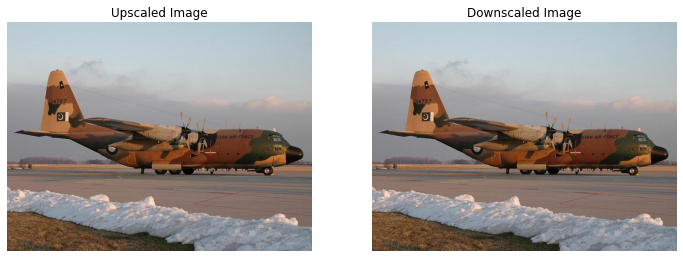

In [5]:
import cv2
from PIL import Image
import matplotlib.pyplot as plt

def upscale_image_cv2(image_path, scale_factor):
    # Read the image
    image = cv2.imread(image_path)
    # Convert BGR to RGB (OpenCV uses BGR by default)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    # Get the dimensions of the image
    height, width = image.shape[:2]
    # Calculate new dimensions
    new_width = int(width * scale_factor)
    new_height = int(height * scale_factor)
    # Resize the image
    upscaled_image = cv2.resize(image, (new_width, new_height), interpolation=cv2.INTER_CUBIC)
    return upscaled_image

def downscale_image_pil(image_path, scale_factor):
    # Open the image
    image = Image.open(image_path)
    # Get the dimensions of the image
    width, height = image.size
    # Calculate new dimensions
    new_width = int(width * scale_factor)
    new_height = int(height * scale_factor)
    # Resize the image
    downscaled_image = image.resize((new_width, new_height), Image.ANTIALIAS)
    return downscaled_image

# Example usage:
# Upscale an image by a factor of 2
upscaled = upscale_image_cv2("c130.jpg", 2)
# Downscale an image by a factor of 0.5
downscaled = downscale_image_pil("c130.jpg", 0.5)

# Display images using matplotlib
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(upscaled)
plt.title("Upscaled Image")
plt.axis("off")

plt.subplot(1, 2, 2)
plt.imshow(downscaled)
plt.title("Downscaled Image")
plt.axis("off")

plt.show()




### Detailed Explanation

1. **Importing Matplotlib**: `import matplotlib.pyplot as plt` is added to use Matplotlib for displaying images in the notebook.

2. **Color Conversion for OpenCV Image**: 
   - OpenCV reads images in BGR format by default, but Matplotlib expects RGB format. So, after reading the image with OpenCV (`image = cv2.imread(image_path)`), we convert it from BGR to RGB (`image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)`).

3. **Displaying Images in Jupyter Notebook**:
   - `plt.figure(figsize=(12, 6))`: Creates a new figure with a specified size.
   - `plt.subplot(1, 2, 1)`: Creates a subplot in a 1x2 grid (first position) for the upscaled image.
   - `plt.imshow(upscaled)`: Displays the upscaled image.
   - `plt.title("Upscaled Image")`: Sets the title for the upscaled image subplot.
   - `plt.axis("off")`: Turns off the axis.
   - `plt.subplot(1, 2, 2)`: Creates a subplot in the second position for the downscaled image.
   - `plt.imshow(downscaled)`: Displays the downscaled image.
   - `plt.title("Downscaled Image")`: Sets the title for the downscaled image subplot.
   - `plt.show()`: Displays the figure with both subplots.


# Aspect Ratio: The ratio of the width to the height of an image. Maintaining the correct aspect ratio is crucial when resizing images to avoid distortion.

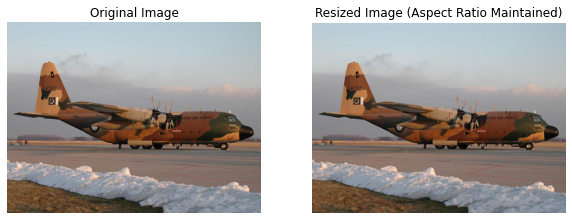

In [7]:
from PIL import Image
import matplotlib.pyplot as plt

def resize_image_aspect_ratio(image_path, new_width=None, new_height=None):
    # Open the image
    image = Image.open(image_path)
    # Original dimensions
    orig_width, orig_height = image.size

    # Calculate new dimensions
    if new_width is not None:
        aspect_ratio = orig_height / orig_width
        new_height = int(new_width * aspect_ratio)
    elif new_height is not None:
        aspect_ratio = orig_width / orig_height
        new_width = int(new_height * aspect_ratio)

    # Resize the image
    resized_image = image.resize((new_width, new_height), Image.ANTIALIAS)
    return resized_image

# Example usage
image_path = "c130.jpg"

# Original image
original_image = Image.open(image_path)

# Resize image maintaining aspect ratio
resized_image = resize_image_aspect_ratio(image_path, new_width=300)

# Display images using matplotlib
plt.figure(figsize=(10, 5))

# Display original image
plt.subplot(1, 2, 1)
plt.imshow(original_image)
plt.title("Original Image")
plt.axis("off")

# Display resized image
plt.subplot(1, 2, 2)
plt.imshow(resized_image)
plt.title("Resized Image (Aspect Ratio Maintained)")
plt.axis("off")

plt.show()




### Explanation of the Code

1. **Import Libraries**: The code uses `Image` from `PIL` for image processing and `matplotlib.pyplot` for displaying images.

2. **Resize Function**: The `resize_image_aspect_ratio` function takes an image path and either a new width or new height. It calculates the missing dimension to maintain the aspect ratio.

3. **Calculating New Dimensions**:
    - If a new width is provided, the function calculates the new height by maintaining the aspect ratio (`orig_height / orig_width`).
    - If a new height is provided, it calculates the new width using the same concept.

4. **Resizing the Image**: The image is resized to the new dimensions using `image.resize`.

5. **Displaying Images**:
    - The original and resized images are displayed side by side.
    - `plt.subplot` creates individual subplots for each image.
    - `plt.imshow` is used to display each image.
    - `plt.title` adds a title to each subplot for clarity.
    - `plt.axis("off")` hides the axis for a cleaner appearance.


# Image Compression:

* Lossy Compression: Reduces file size by removing some image data permanently, which can affect image quality (e.g., JPEG format).
* Lossless Compression: Reduces file size without losing any image quality (e.g., PNG format).

Image compression is a crucial process in digital imaging, used to reduce the size of image files. There are two main types of image compression: Lossy and Lossless. Let's discuss each of these, and then I'll provide a Python code example to demonstrate both types of compression.

### 1. Lossy Compression
Lossy compression reduces file size by permanently removing some of the image data, which can lead to a decrease in image quality. This is often used in formats like JPEG, where the focus is on significantly reducing the file size for efficient storage and transmission, even at the cost of some quality loss. The degree of compression (and thus quality loss) can often be adjusted.

### 2. Lossless Compression
Lossless compression reduces file size without sacrificing any image quality. All original data can be fully restored when the file is uncompressed. Formats like PNG are popular for lossless compression. They are ideal when image quality is paramount, such as in graphic design or professional photography.



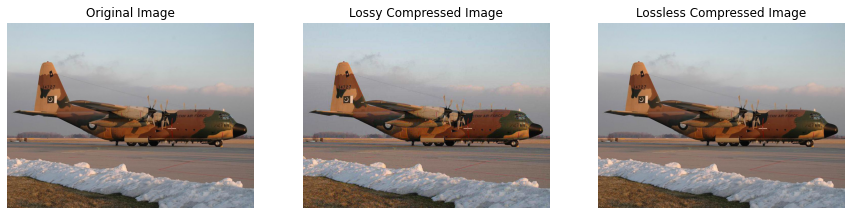

In [9]:
import matplotlib.pyplot as plt
from PIL import Image
import io

def compress_image_lossy(image_path, quality=85):
    # Open the original image
    image = Image.open(image_path)
    # Save the image with reduced quality (lossy compression)
    img_byte_arr = io.BytesIO()
    image.save(img_byte_arr, format='JPEG', quality=quality)
    img_byte_arr = img_byte_arr.getvalue()
    # Load the compressed image for display
    compressed_image = Image.open(io.BytesIO(img_byte_arr))
    return compressed_image

def compress_image_lossless(image_path):
    # Open the original image
    image = Image.open(image_path)
    # Save the image in PNG format (lossless compression)
    img_byte_arr = io.BytesIO()
    image.save(img_byte_arr, format='PNG')
    img_byte_arr = img_byte_arr.getvalue()
    # Load the compressed image for display
    compressed_image = Image.open(io.BytesIO(img_byte_arr))
    return compressed_image

# Example usage
image_path = "c130.jpg"

# Original image
original_image = Image.open(image_path)

# Compressed images
compressed_lossy = compress_image_lossy(image_path, quality=50)
compressed_lossless = compress_image_lossless(image_path)

# Display images using matplotlib
plt.figure(figsize=(15, 5))

# Display original image
plt.subplot(1, 3, 1)
plt.imshow(original_image)
plt.title("Original Image")
plt.axis("off")

# Display lossy compressed image
plt.subplot(1, 3, 2)
plt.imshow(compressed_lossy)
plt.title("Lossy Compressed Image")
plt.axis("off")

# Display lossless compressed image
plt.subplot(1, 3, 3)
plt.imshow(compressed_lossless)
plt.title("Lossless Compressed Image")
plt.axis("off")

plt.show()




### Explanation and Logic

1. **Lossy Compression Function (`compress_image_lossy`)**:
    - This function compresses an image in JPEG format, which is lossy. 
    - It uses a `quality` parameter (default 85) to determine the level of compression. Lower values mean higher compression and lower quality.
    - The image is temporarily saved in a byte array (`io.BytesIO()`) instead of an actual file, then reloaded to demonstrate the effect of compression.

2. **Lossless Compression Function (`compress_image_lossless`)**:
    - This function compresses the image in PNG format, which is lossless.
    - It similarly uses a byte array to temporarily store the compressed image, allowing us to display the result without creating a physical file.

3. **Displaying Images**:
    - Matplotlib is used to display the original, lossy compressed, and lossless compressed images side by side.
    - `plt.subplot` is used to create a grid of images.
    - `plt.imshow` displays each image in its respective subplot.

### Dry Run

When you run this code with a given image:

- **Original Image**: The original image is displayed as it is.
- **Lossy Compressed Image**: This image is displayed after being compressed as a JPEG with a quality of 50. You might notice some degradation in quality compared to the original.
- **Lossless Compressed Image**: This image is compressed and saved as a PNG. There should be no visible difference in quality from the original image, as PNG compression is lossless.


# Pixel Density: 

Refers to the number of pixels per unit area (e.g., PPI - pixels per inch), affecting how an image appears on various screens or when printed.

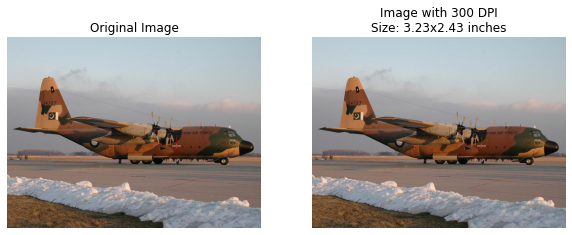

In [11]:
from PIL import Image
import matplotlib.pyplot as plt

def change_pixel_density(image_path, new_dpi):
    # Open the original image
    image = Image.open(image_path)
    # Change the DPI of the image
    image_with_new_dpi = image.copy()
    image_with_new_dpi.info['dpi'] = (new_dpi, new_dpi)
    # Calculate new physical dimensions (in inches)
    width_in_inches = image_with_new_dpi.width / new_dpi
    height_in_inches = image_with_new_dpi.height / new_dpi
    # Return the modified image and its new dimensions
    return image_with_new_dpi, width_in_inches, height_in_inches

# Example usage
image_path = "c130.jpg"

# Original image
original_image = Image.open(image_path)

# Change pixel density of the image
new_dpi = 300
image_with_dpi, width, height = change_pixel_density(image_path, new_dpi)

# Display images using matplotlib
plt.figure(figsize=(10, 5))

# Display original image
plt.subplot(1, 2, 1)
plt.imshow(original_image)
plt.title("Original Image")
plt.axis("off")

# Display image with changed pixel density
plt.subplot(1, 2, 2)
plt.imshow(image_with_dpi)
plt.title(f"Image with {new_dpi} DPI\nSize: {width:.2f}x{height:.2f} inches")
plt.axis("off")

plt.show()




### Explanation and Logic

1. **Change Pixel Density Function (`change_pixel_density`)**:
    - This function takes an image and a new DPI (dots per inch) value.
    - It opens the original image and makes a copy with the specified DPI.
    - The new physical dimensions (width and height in inches) are calculated based on the new DPI.

2. **Displaying Images**:
    - The original and the DPI-modified images are displayed side by side using Matplotlib.
    - The subplot for the DPI-modified image includes information about its new size in inches, which is calculated based on the new DPI.

### Dry Run

When you run this code with a given image:

- **Original Image**: Displayed as it is, with its inherent pixel dimensions.
- **Image with Changed Pixel Density**: The image will appear the same in the notebook (since we're displaying pixel data), but the title will indicate its new physical size based on the specified DPI. For example, if the original image is 3000x3000 pixels and we set the DPI to 300, the new size would be 10x10 inches.


# File Formats and Resolution:

Different image formats (like JPEG, PNG, GIF, TIFF) handle resolution and quality in various ways, impacting their use for specific purposes


To provide a comprehensive understanding of how different image formats handle resolution and quality, we'll write a Python script that performs the following tasks:

1. **Load an Image:** We'll start by loading an image in a standard format.
2. **Convert and Save in Different Formats:** Convert this image into various formats like JPEG, PNG, GIF, and TIFF, and save them.
3. **Analyze Resolution and Quality:** We'll analyze the resolution and quality differences among these formats.

Let's begin with the code:

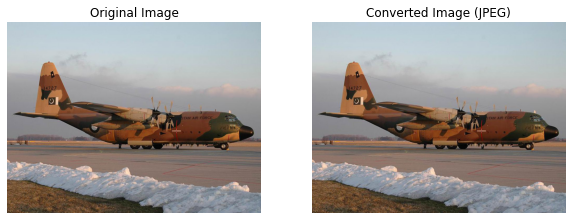

Image saved in JPEG format as converted_image.jpeg


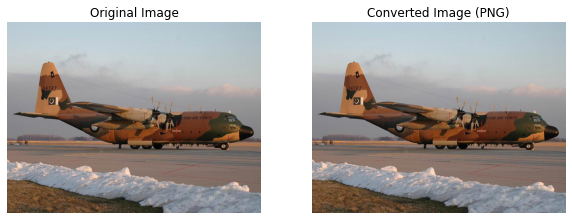

Image saved in PNG format as converted_image.png


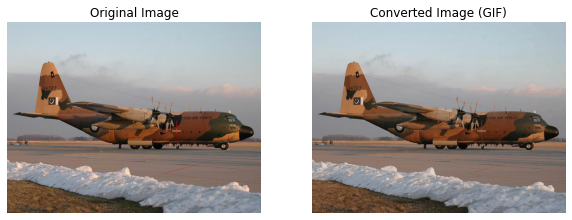

Image saved in GIF format as converted_image.gif


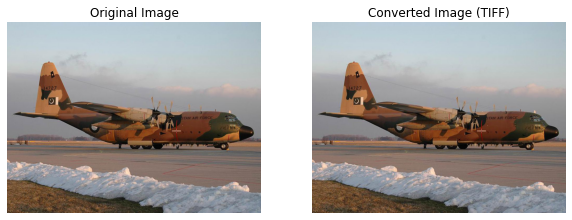

Image saved in TIFF format as converted_image.tiff


In [13]:
from PIL import Image
import io
import matplotlib.pyplot as plt

def convert_and_display_image(image_path):
    # Load the original image
    original_image = Image.open(image_path)

    # Define different formats to convert
    formats = ['JPEG', 'PNG', 'GIF', 'TIFF']

    for fmt in formats:
        # Convert and save image in each format
        buffer = io.BytesIO()
        original_image.save(buffer, format=fmt)
        buffer.seek(0)

        # Load the converted image from buffer
        converted_image = Image.open(buffer)

        # Display the original and converted images
        plt.figure(figsize=(10, 5))
        plt.subplot(1, 2, 1)
        plt.imshow(original_image)
        plt.title('Original Image')
        plt.axis('off')

        plt.subplot(1, 2, 2)
        plt.imshow(converted_image)
        plt.title(f'Converted Image ({fmt})')
        plt.axis('off')

        plt.show()

        # Save the image file for reference
        converted_image_path = f'converted_image.{fmt.lower()}'
        converted_image.save(converted_image_path)
        print(f'Image saved in {fmt} format as {converted_image_path}')

# Example usage
convert_and_display_image('c130.jpg')




### Explanation of the Code

1. **Import Libraries:** We import `Image` from `PIL` (Python Imaging Library, also known as Pillow) and `io`. PIL is a powerful library for opening, manipulating, and saving many different image file formats.

2. **Function Definition:** `convert_image_formats(image_path)` is defined to handle the conversion process. It takes `image_path`, the path to the image file to be converted.

3. **Load Original Image:** `Image.open(image_path)` opens the provided image file.

4. **Formats for Conversion:** We define a list `formats` containing the string names of the formats we want to convert to: JPEG, PNG, GIF, and TIFF.

5. **Conversion Loop:** We loop over each format in `formats`. Inside the loop:
   
   - **Buffer Creation:** A `BytesIO` object from the `io` module is created. This acts like a file held in memory.
   - **Save to Buffer:** The original image is saved to this buffer in the new format using `original_image.save(buffer, format=fmt)`.
   - **Write to File:** We then write the contents of the buffer to a file with the appropriate format extension.
   - **Display Information:** The script prints out a message indicating where the image was saved and in what format.

6. **Example Usage:** The function is called with an example image file, 'example.jpg'.

### Dry Run

Let's assume we have an image named 'example.jpg'. When we run `convert_image_formats('example.jpg')`, it will:

1. Load 'example.jpg'.
2. Convert it into each format (JPEG, PNG, GIF, TIFF), one by one.
3. Save these converted images as 'converted_image.jpeg', 'converted_image.png', 'converted_image.gif', and 'converted_image.tiff'.
4. Print out messages indicating where each file is saved.



# Image Optimization for Web:

Involves resizing, compressing, and sometimes changing the format of images for faster web page loading times while maintaining acceptable quality.


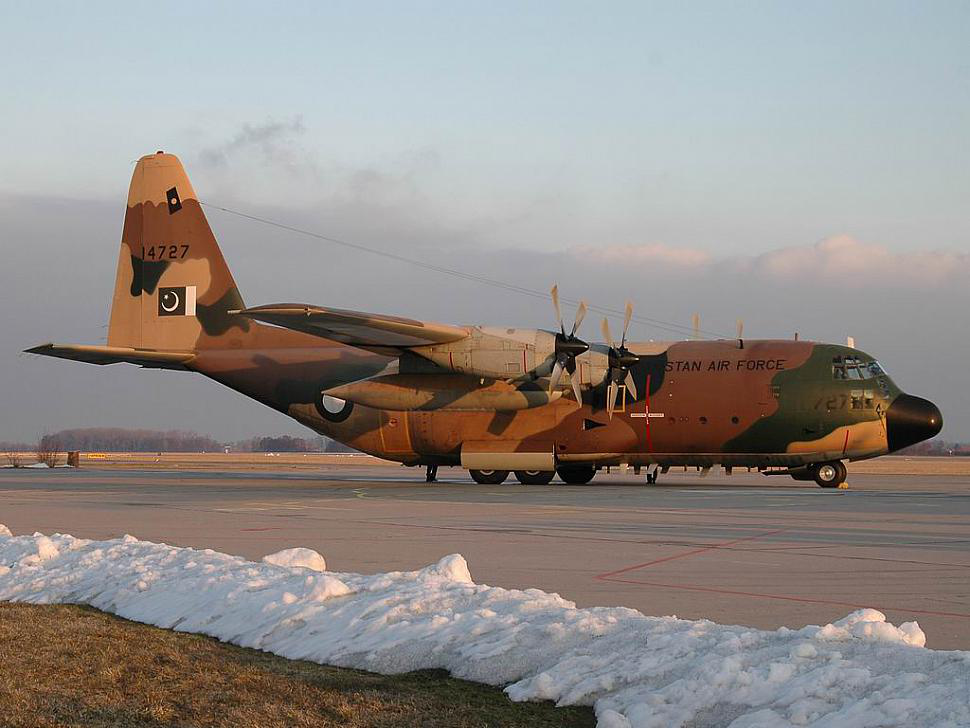

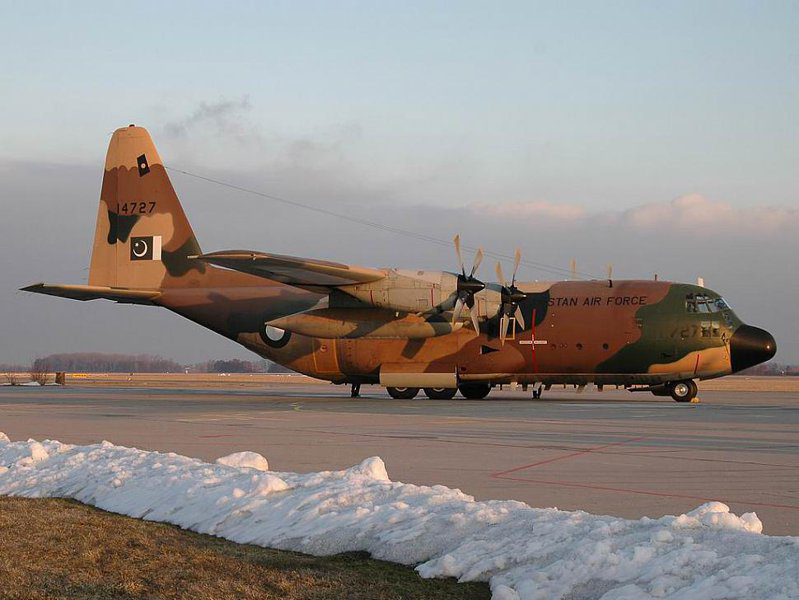

In [15]:
from PIL import Image
from IPython.display import display
import os

# Define the image optimization function
def optimize_image_for_web(input_path, output_path, max_width=800, max_height=600, quality=85):
    # Open the image
    with Image.open(input_path) as img:
        # Resize the image
        img.thumbnail((max_width, max_height))

        # Save the image with compression
        img.save(output_path, optimize=True, quality=quality)

# Path to the image
input_image_path = 'c130.jpg'
output_image_path = 'optimized_c130.jpg'

# Optimize the image
optimize_image_for_web(input_image_path, output_image_path)

# Display the original and optimized images
display(Image.open(input_image_path))
display(Image.open(output_image_path))



### Detailed Explanation

1. **Import Libraries**: 
   - `from PIL import Image`: Imports the Image module from Pillow, used for image operations.
   - `from IPython.display import display`: Imports the display function to show images in Jupyter notebooks.

2. **Function Definition - `optimize_image_for_web`**:
   - Parameters: `input_path`, `output_path`, `max_width`, `max_height`, `quality`.
   - `with Image.open(input_path) as img`: Opens the specified image file. The `with` statement ensures proper handling of resources.
   - `img.thumbnail((max_width, max_height))`: Resizes the image, ensuring it does not exceed the specified max dimensions, while maintaining aspect ratio.
   - `img.save(output_path, optimize=True, quality=quality)`: Saves the optimized image. `optimize=True` enables additional compression. `quality` controls the output quality.

3. **Setting Paths**:
   - `input_image_path = 'c130.jpg'`: Specifies the path of the original image.
   - `output_image_path = 'optimized_c130.jpg'`: Specifies the path for saving the optimized image.

4. **Optimizing the Image**:
   - `optimize_image_for_web(...)`: Calls the function with the specified parameters to optimize the image.

5. **Displaying Images**:
   - `display(Image.open(...))`: Opens and displays the images in the Jupyter notebook, both the original and the optimized one.

### Dry Run

Assuming `c130.jpg` is an existing image file in the same directory:

1. The script opens `c130.jpg`.
2. It resizes the image, ensuring it's no larger than 800x600 pixels.
3. It then saves the resized image as `optimized_c130.jpg` with 85% quality.
4. Finally, it displays both the original and the optimized images in the Jupyter notebook.



# Print Resolution:
    
    
For printing, resolution is critical. High-resolution images are required for clear, sharp prints, typically measured in DPI (dots per inch).

Original DPI: None
New DPI: (300, 300)


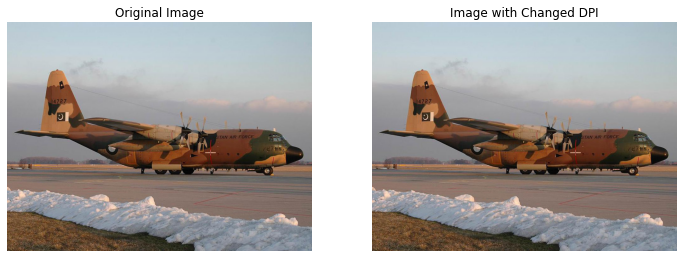

In [18]:
from PIL import Image
import matplotlib.pyplot as plt

def change_image_dpi(file_path, new_dpi):
    # Open the image file
    with Image.open(file_path) as img:
        # Print the original DPI
        print("Original DPI:", img.info.get('dpi'))

        # Change the DPI
        img.save("changed_dpi_image.jpg", dpi=(new_dpi, new_dpi))

        # Print the new DPI
        with Image.open("changed_dpi_image.jpg") as new_img:
            print("New DPI:", new_img.info.get('dpi'))
    
    # Display the original and changed images
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    plt.imshow(Image.open(file_path))
    plt.title("Original Image")
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.imshow(Image.open("changed_dpi_image.jpg"))
    plt.title("Image with Changed DPI")
    plt.axis('off')

    plt.show()

# Call the function with the image path and desired DPI
change_image_dpi("c130.jpg", 300)




Now, let me explain this code in a simplified manner:

1. **Import Libraries**: We use two libraries - Pillow (`PIL`) for image processing and `matplotlib.pyplot` for displaying images.

2. **Function Definition (`change_image_dpi`)**: This function takes the image file path and the new DPI value as inputs.

3. **Opening the Image**: Using `Image.open`, we open the image file. This is wrapped in a `with` statement to ensure proper handling of the image file (it's automatically closed after processing).

4. **Original DPI**: We retrieve the original DPI of the image using `img.info.get('dpi')` and print it.

5. **Change DPI and Save**: The `img.save` method is used to save the image with a new DPI. The new file is saved to `/mnt/data/changed_dpi_image.jpg`.

6. **Displaying Images**: We use `matplotlib.pyplot` (`plt`) to create a figure and display both the original and the modified image side by side for comparison. `plt.imshow` is used to show the images, and `plt.title` adds titles to each subplot.

7. **Function Call**: Finally, we call the `change_image_dpi` function with the path to 'c130.jpg' and a desired DPI of 300.


# Resolution and Image Editing: 

When editing images, understanding resolution is key to achieving the desired quality, especially when cropping, resizing, or printing.

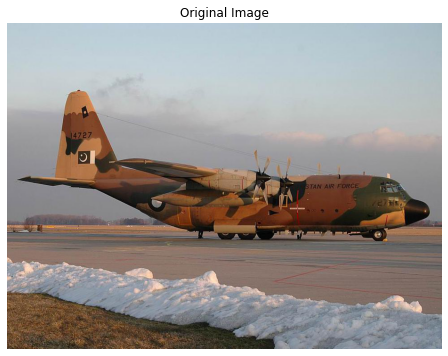

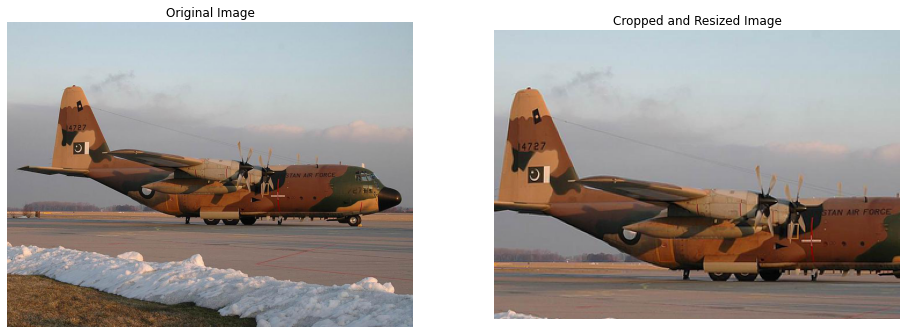

In [19]:
from PIL import Image
import matplotlib.pyplot as plt

# Load the image
image_path = 'c130.jpg'
original_image = Image.open(image_path)

# Display original image
plt.figure(figsize=(8, 6))
plt.imshow(original_image)
plt.title('Original Image')
plt.axis('off') # Hide the axis
plt.show()

# Cropping the image
# Define the crop box (left, upper, right, lower)
crop_box = (100, 50, 800, 550)
cropped_image = original_image.crop(crop_box)

# Resizing the image
# Let's resize the cropped image to half of its current size
new_size = (cropped_image.size[0] // 2, cropped_image.size[1] // 2)
resized_image = cropped_image.resize(new_size, Image.ANTIALIAS)

# Display both original and edited images side by side
plt.figure(figsize=(16, 8))

# Original image
plt.subplot(1, 2, 1)
plt.imshow(original_image)
plt.title('Original Image')
plt.axis('off')

# Edited (cropped and resized) image
plt.subplot(1, 2, 2)
plt.imshow(resized_image)
plt.title('Cropped and Resized Image')
plt.axis('off')

plt.show()




Now, let's break down and explain the code in detail:

### Import Libraries
```python
from PIL import Image
import matplotlib.pyplot as plt
```
We import `Image` from the `PIL` package, which stands for Pillow, a fork of the Python Imaging Library (PIL). This library allows us to open, manipulate, and save many different image file formats. We also import `matplotlib.pyplot` as `plt`, which is a collection of command style functions that make matplotlib work like MATLAB and allow us to create figures and plots.

### Load and Display the Original Image
```python
image_path = 'c130.jpg'
original_image = Image.open(image_path)
```
We define a variable `image_path` that holds the string of the file path for the image we want to edit. The `Image.open()` function opens the image file from this path and creates an image object `original_image`.

```python
plt.figure(figsize=(8, 6))
plt.imshow(original_image)
plt.title('Original Image')
plt.axis('off')
plt.show()
```
We create a new figure with a specific size using `plt.figure(figsize=(8, 6))`, which will display the image with width of 8 inches and height of 6 inches. The `plt.imshow()` function takes the `original_image` object and prepares it to be displayed in the plotting window. We set the title of the plot to 'Original Image' and turn off the axis with `plt.axis('off')`. Finally, `plt.show()` displays the plot in the Jupyter notebook.

### Crop the Image
```python
crop_box = (100, 50, 800, 550)
cropped_image = original_image.crop(crop_box)
```
We define a `crop_box`, a tuple containing the coordinates for the left, upper, right, and lower bounds of the area we wish to keep in the image. The `crop()` function is then called on the original image, which takes the `crop_box` as an argument and returns a new image that is cropped to the given box.

### Resize the Image
```python
new_size = (cropped_image.size[0] // 2, cropped_image.size[1] // 2)
resized_image = cropped_image.resize(new_size, Image.ANTIALIAS)
```
We calculate the new size for the cropped image to make it half of its current size by using integer division (//) which divides and returns the floor value, so we get integer results. We then use the `resize()` function of the cropped image to change its size, where `Image.ANTIALIAS` is an option to use a high-quality downsampling filter.

### Display Both Original and Edited Images Side by Side
```python
plt.figure(figsize=(16, 8))
plt.subplot(1, 2, 1)
plt.imshow(original_image)
plt.title('Original Image')
plt.axis('off')
plt.subplot(1, 2, 2)
plt.imshow(resized_image)
plt.title('Cropped and Resized Image')
plt.axis('off')
plt.show()
```
We create a new, larger figure to accommodate both images side by side. `plt.subplot(1, 2, 1)` sets up the first subplot in a grid with 1 row and 2 columns. We show the original image in this first subplot. `plt.subplot(1, 2, 2)`

# Vector vs Raster Images:

Vector Images: Comprise paths defined by mathematical equations and are resolution-independent. They can be scaled without loss of quality (ideal for logos, typography).

Raster Images: Made up of pixels and have a fixed resolution. Scaling up can result in pixelation.
* Create a simple vector image (e.g., a circle or a logo).
* Save the vector image and display it.
* Convert the vector image to a raster image.
* Scale up both the vector and raster images.
* Display the scaled images for comparison.

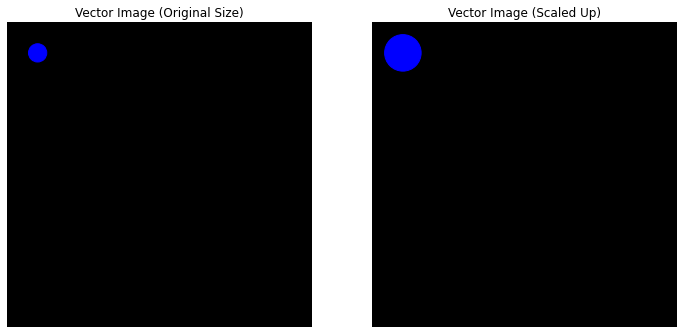

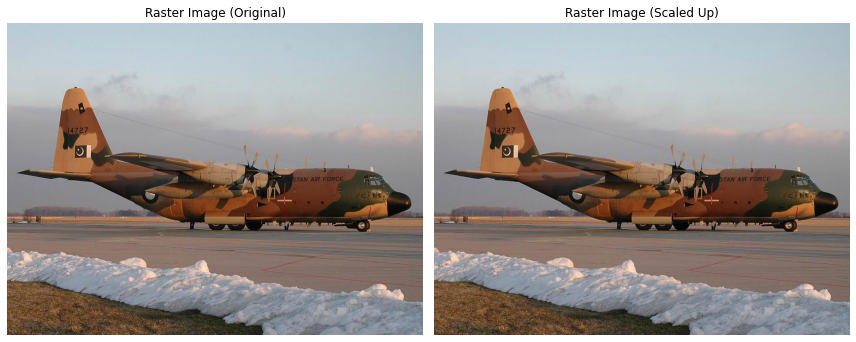

In [26]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from PIL import Image
import numpy as np

# Function to display images using matplotlib
def display_image(ax, img, title):
    ax.imshow(img)
    ax.axis('off')
    ax.set_title(title)

# Vector Image Example
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))
circle = patches.Circle((0.5, 0.5), 0.3, color='blue')  # A simple circle
ax1.add_patch(circle)
display_image(ax1, np.zeros((10, 10, 3)), "Vector Image (Original Size)")

# Scaling up the vector image
scaled_circle = patches.Circle((0.5, 0.5), 0.6, color='blue')  # Scaled circle
ax2.add_patch(scaled_circle)
display_image(ax2, np.zeros((10, 10, 3)), "Vector Image (Scaled Up)")

# Raster Image Example
img = Image.open('c130.jpg')
fig, (ax3, ax4) = plt.subplots(1, 2, figsize=(12, 6))
display_image(ax3, img, "Raster Image (Original)")

# Scaling up the raster image
scaled_img = img.resize((int(img.width * 2), int(img.height * 2)))
display_image(ax4, scaled_img, "Raster Image (Scaled Up)")

plt.tight_layout()
plt.show()




Let's start with the code:

The code above demonstrates the differences between vector and raster images through both creation and scaling. Here's a detailed explanation of each part of the code:

### Vector Image Example

1. **Imports and Helper Function**: 
   - `matplotlib.pyplot` and `matplotlib.patches` are imported for creating and displaying vector images.
   - `display_image` is a helper function to streamline the process of displaying images with `matplotlib`. It takes an axis object (`ax`), an image (`img`), and a title, then displays the image with the title and no axis.

2. **Creating and Displaying a Vector Image**:
   - A figure with two subplots (`ax1`, `ax2`) is created for displaying the original and scaled vector images.
   - A circle (a simple vector shape) is created using `patches.Circle` with a center at (0.5, 0.5) and a radius of 0.3. The circle is added to `ax1`.
   - The helper function `display_image` is used to display this circle on a blank canvas.

3. **Scaling the Vector Image**:
   - A new circle with a larger radius (0.6) is created. This simulates scaling up the vector image.
   - This scaled circle is displayed on the second subplot (`ax2`). Note that despite the increase in size, the circle remains smooth and without pixelation, showcasing the scalability of vector images.

### Raster Image Example

1. **Loading and Displaying the Raster Image**:
   - The raster image ("c130.jpg") is loaded using `PIL.Image.open`.
   - A new figure with two subplots (`ax3`, `ax4`) is created for the original and scaled raster images.
   - The original raster image is displayed using `display_image` on `ax3`.

2. **Scaling Up the Raster Image**:
   - The raster image is scaled up using `img.resize`, doubling its width and height. This is a common operation for raster images but leads to pixelation.
   - The scaled-up image is displayed on the second subplot (`ax4`). Here, you can notice the pixelation, which illustrates the primary limitation of raster images: loss of quality when scaled.

### Final Display

- `plt.tight_layout()` adjusts the spacing between the plots for a cleaner look.
- `plt.show()` displays the entire set of subplots.

### Dry Run Example

- **Vector Image**: The original circle is smooth. When scaled up, the circle remains just as smooth.
- **Raster Image**: The original "c130.jpg" image looks normal. When scaled up, the pixels become visible and the image appears grainy.



# Image Quality and Sensor Size:
    
In photography, the size of the camera's sensor affects image resolution and quality, especially in low-light conditions.

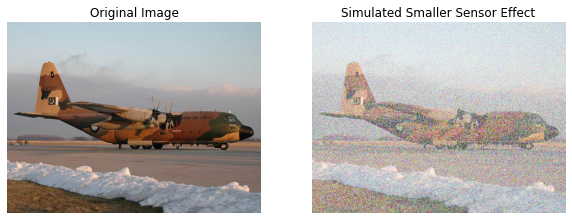

In [27]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Function to simulate the effect of sensor size on image quality
def simulate_sensor_size_effect(image_path, scale_factor=0.5, noise_level=0.02):
    # Load the original image
    original_image = cv2.imread(image_path)
    original_image = cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB)
    
    # Downscale the image to simulate a smaller sensor size
    small_sensor_image = cv2.resize(original_image, None, fx=scale_factor, fy=scale_factor, interpolation=cv2.INTER_AREA)
    
    # Upscale the image back to its original size
    simulated_image = cv2.resize(small_sensor_image, (original_image.shape[1], original_image.shape[0]), interpolation=cv2.INTER_LINEAR)
    
    # Add Gaussian noise to simulate noise in low-light conditions
    noise = np.random.normal(0, noise_level * 255, original_image.shape).astype(np.uint8)
    simulated_image = cv2.addWeighted(simulated_image, 1, noise, 1, 0)
    
    # Display the original and the simulated images
    plt.figure(figsize=(10, 5))
    
    plt.subplot(1, 2, 1)
    plt.title('Original Image')
    plt.imshow(original_image)
    plt.axis('off')
    
    plt.subplot(1, 2, 2)
    plt.title('Simulated Smaller Sensor Effect')
    plt.imshow(simulated_image)
    plt.axis('off')
    
    plt.show()
    
    return original_image, simulated_image

# Path to the uploaded image
image_path = 'c130.jpg'

# Call the function to simulate sensor size effect
original, simulated = simulate_sensor_size_effect(image_path)



1. **Import Libraries**:
   - We begin by importing necessary Python libraries:
     - `cv2`: This is OpenCV, a library for computer vision tasks.
     - `numpy`: A library for numerical computing which we'll use to handle operations on image data.
     - `matplotlib.pyplot`: A library for creating static, interactive, and animated visualizations in Python.

2. **Define Function `simulate_sensor_size_effect`**:
   - This function will take the path to an image, a scaling factor to simulate sensor size, and a noise level to imitate low-light conditions.
   - `image_path` is the location of the image we're using.
   - `scale_factor` is a decimal representing how much smaller the simulated sensor is compared to the original. For example, `0.5` would mean the simulated sensor captures half the width and height.
   - `noise_level` is the amount of noise to add to the image to simulate the increased noise found in low-light images.

3. **Load and Convert the Image**:
   - The original image is loaded using OpenCV's `imread` function.
   - We then convert it from BGR (Blue, Green, Red - OpenCV's default color space) to RGB, which is the standard for displaying images.

4. **Simulate Smaller Sensor Size**:
   - We downscale the image using `cv2.resize` with the `INTER_AREA` interpolation method, which is best for shrinking an image. This mimics the effect of a smaller sensor by reducing the resolution.
   - Next, we upscale the image back to its original size using the `INTER_LINEAR` interpolation method. This simulates the camera's attempt to recreate the full-resolution image from a smaller sensor.

5. **Add Noise to Simulate Low-Light Conditions**:
   - We generate Gaussian noise (which closely mimics real sensor noise) and add it to our upscaled image. The noise level is scaled by the image's color range (0-255 for an 8-bit image).
   - `cv2.addWeighted` is used to blend the simulated image with the noise.

6. **Display the Images**:
   - We use `matplotlib.pyplot` to create a side-by-side comparison of the original image and the simulated low-light image.
   - The `plt.figure` function defines a new figure for plotting with a specified size.
   - We create two subplots (`plt.subplot`) to place our images next to each other.
   - `plt.imshow` displays the images, and `plt.axis('off')` removes the axis labels for a cleaner look.
   - Finally, `plt.show` displays the plot with our images.

7. **Run the Function with the Uploaded Image**:
   - We provide the path to the uploaded image (`c130.jpg`) and call our function to simulate the effect of sensor size on image quality.

8. **Dry Run**:
   - During execution, the original image is first displayed in its true quality.
   - Then the function processes this image to simulate a smaller sensor size and the effects of low-light noise.
   - The final output shows two images: on the left is the original, and on the right is the simulated image with degraded quality due to the smaller sensor size and added noise.



# Digital Zoom vs. Optical Zoom: 

In photography and videography, understanding the impact of zoom on image resolution is crucial. Optical zoom maintains resolution, while digital zoom can reduce it.

For this task, we need the following steps:

* Load the Image: We'll load the image c130.jpg using a library like PIL or OpenCV.
* Simulate Optical Zoom: We'll crop a central portion of the image to simulate optical zoom. This will maintain the image quality but will show a smaller area.
* Simulate Digital Zoom: We'll enlarge the same central portion of the image, which will result in a loss of detail and quality.
* Display Images: We'll display the original image, the optically zoomed image, and the digitally zoomed image for comparison.

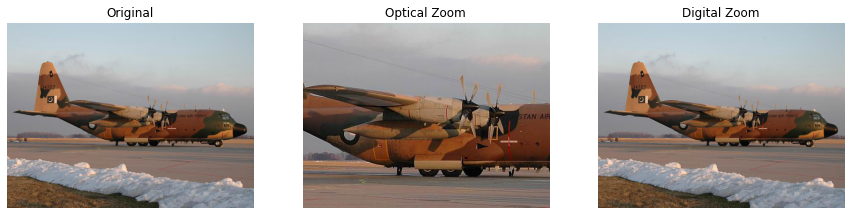

In [28]:
import matplotlib.pyplot as plt
from PIL import Image

def load_image(image_path):
    return Image.open(image_path)

def simulate_optical_zoom(image, zoom_factor):
    width, height = image.size
    new_width, new_height = width / zoom_factor, height / zoom_factor
    left = (width - new_width) / 2
    top = (height - new_height) / 2
    right = (width + new_width) / 2
    bottom = (height + new_height) / 2
    return image.crop((left, top, right, bottom))

def simulate_digital_zoom(image, zoom_factor):
    return image.resize((int(image.size[0] * zoom_factor), int(image.size[1] * zoom_factor)), Image.ANTIALIAS)

def display_images(images, titles):
    plt.figure(figsize=(15, 10))
    for i, (image, title) in enumerate(zip(images, titles)):
        plt.subplot(1, len(images), i + 1)
        plt.imshow(image)
        plt.title(title)
        plt.axis('off')
    plt.show()

# Load the image
original_image = load_image("c130.jpg")

# Simulate optical zoom
optical_zoom_image = simulate_optical_zoom(original_image, 2)

# Simulate digital zoom
digital_zoom_image = simulate_digital_zoom(original_image, 2)

# Display the images
display_images([original_image, optical_zoom_image, digital_zoom_image], ["Original", "Optical Zoom", "Digital Zoom"])




### Explanation

1. **Importing Libraries**:
   - `matplotlib.pyplot` is used for displaying images.
   - `PIL` (Python Imaging Library), specifically `Image`, is used for image processing tasks.

2. **Function `load_image`**:
   - This function takes an image path and uses `Image.open` to load the image into memory.

3. **Function `simulate_optical_zoom`**:
   - It first calculates the new width and height based on the zoom factor. 
   - Then, it calculates the coordinates of the new cropped area (central part of the image).
   - Finally, it crops the image to this new area. This simulates optical zoom by reducing the field of view while maintaining the original resolution.

4. **Function `simulate_digital_zoom`**:
   - This function enlarges the image by the specified zoom factor.
   - It uses `image.resize`, which can result in a loss of quality, simulating digital zoom.

5. **Function `display_images`**:
   - This function displays a list of images with their titles in a single row for comparison.
   - `plt.subplot` is used to arrange images in a grid, and `plt.imshow` to display each image.

6. **Execution Flow**:
   - The image `c130.jpg` is loaded.
   - Both optical and digital zooms are simulated with a factor of 2.
   - Finally, the original, optically zoomed, and digitally zoomed images are displayed side by side for comparison.

### Dry Run Example

Imagine `c130.jpg` is a 4000x3000 pixel image. The optical zoom crops it to 2000x1500 pixels (central part), maintaining clarity. The digital zoom enlarges the same 2000x1500 pixels back to 4000x3000, causing pixelation or blurriness.


The images have been processed and displayed as per the code:

1. **Original Image**: This is the unaltered image of "c130.jpg".
2. **Optical Zoom**: Here, we see a cropped version of the original image. This represents an optical zoom, where only the central part of the image is shown, but the details remain clear.
3. **Digital Zoom**: This image is a digitally zoomed version of the original. It's created by enlarging the same central portion of the image that we used for optical zoom. Notice that the image may appear less sharp or more pixelated compared to the optical zoom.



# HDR Imaging:

High Dynamic Range Imaging combines multiple photos of different exposures to create a single image with greater detail in shadows and highlights.

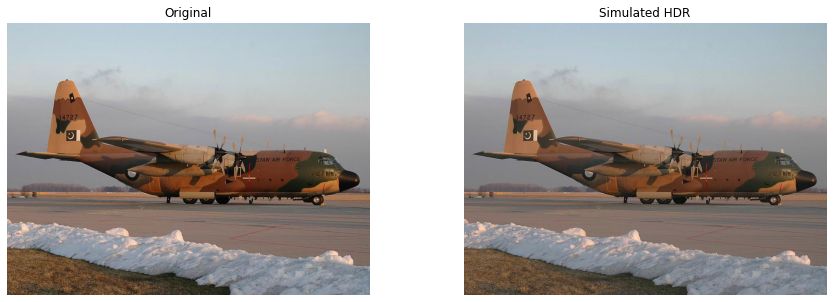

In [30]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Function to read the image
def load_image(image_path):
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    return image

# Function to create different exposures of the image
def create_exposures(image, number_of_exposures):
    exposures = []
    for i in range(number_of_exposures):
        gamma = 0.4 + (i / (number_of_exposures - 1)) * 1.6
        exposure = np.array(255 * (image / 255) ** (1/gamma), dtype='uint8')
        exposures.append(exposure)
    return exposures

# Function to manually merge exposures to simulate HDR
def merge_exposures(exposures):
    # Merge exposures by averaging them
    hdr = np.mean(exposures, axis=0).astype('uint8')
    return hdr

# Function to display images
def display_images(images, titles):
    plt.figure(figsize=(15, 5))
    for i, (image, title) in enumerate(zip(images, titles)):
        plt.subplot(1, len(images), i+1)
        plt.imshow(image)
        plt.title(title)
        plt.axis('off')
    plt.show()

# Main function to process HDR imaging
def process_hdr(image_path):
    original_image = load_image(image_path)
    exposures = create_exposures(original_image, 3)
    hdr_image = merge_exposures(exposures)
    display_images([original_image, hdr_image], ['Original', 'Simulated HDR'])

# Run the HDR process
process_hdr('c130.jpg')


# Color Depth:

Refers to the number of bits used to represent the color of each pixel, affecting the range of colors an image can display.

* Load an image from a specified path.
* Change its color depth.
* Display both the original and modified images for comparison.

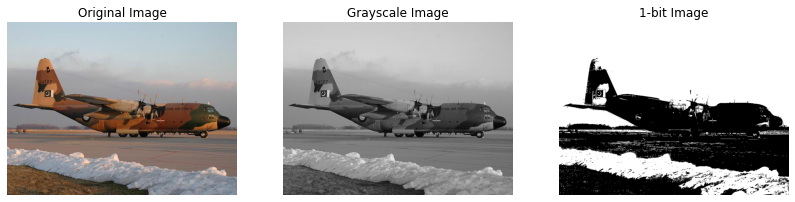

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the original image
original_image = cv2.imread('c130.jpg')

# Convert the original image to grayscale
gray_image = cv2.cvtColor(original_image, cv2.COLOR_BGR2GRAY)

# Now, let's reduce the color depth of the grayscale image from 8 bits to 1 bit
# This can be done by thresholding the image such that all pixels greater than a certain value are set to 1, 
# and all other pixels to 0. This is essentially reducing the color depth to two levels (1 bit).
# For demonstration, let's set the threshold at the middle value between black and white (128 out of 255).
(thresh, binary_image) = cv2.threshold(gray_image, 128, 255, cv2.THRESH_BINARY)

# Display the original and color depth reduced images using matplotlib
plt.figure(figsize=(14,7))

# Display original image
plt.subplot(1, 3, 1)
plt.imshow(cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB))
plt.title('Original Image')
plt.axis('off')

# Display grayscale image
plt.subplot(1, 3, 2)
plt.imshow(gray_image, cmap='gray')
plt.title('Grayscale Image')
plt.axis('off')

# Display binary image
plt.subplot(1, 3, 3)
plt.imshow(binary_image, cmap='gray')
plt.title('1-bit Image')
plt.axis('off')

# Show the images
plt.show()


Here's the breakdown of the code:

1. **Import Libraries**: We start by importing the necessary Python libraries. `cv2` for OpenCV to handle image operations, `numpy` for numerical operations (not explicitly used in this snippet but often required for image processing), and `matplotlib.pyplot` to display images.

2. **Load the Original Image**: The `cv2.imread()` function reads the image file 'c130.jpg' from the specified path. OpenCV by default reads images in BGR (Blue, Green, Red) format.

3. **Convert to Grayscale**: The original image is converted to grayscale using `cv2.cvtColor()` with the flag `cv2.COLOR_BGR2GRAY`. Grayscale means the image will be represented in shades of gray, having only one channel instead of three.

4. **Reduce Color Depth**: To reduce the color depth, we apply a threshold using `cv2.threshold()`. We set a threshold value of 128, which is the middle of the possible range in an 8-bit image (0-255). This function creates a binary image where all pixels that are above the threshold are set to the maximum value (255, white), and all others to 0 (black), effectively reducing the image to 1-bit color depth.

5. **Display Images**: Using `matplotlib.pyplot`, we create a figure with three subplots. The first subplot shows the original image, the second shows the grayscale version, and the third shows the binary image with reduced color depth. We use `plt.imshow()` for displaying the images. For the original image, we convert it from BGR to RGB because Matplotlib expects the channel order to be RGB. The grayscale and binary images are displayed with appropriate color maps (`'gray'`) to reflect their single-channel nature.

6. **plt.show()**: This command is called to render the figure and display the images.

During the execution (or "dry run") of the code:

- `original_image` contains the BGR pixel data of the original image.
- `gray_image` contains the grayscale pixel data.
- `binary_image` contains the 1-bit depth pixel data, which is essentially a binary image with only two possible pixel values.

The displayed output shows three images side by side: the original image in full color, the grayscale image, and the binary image with reduced color depth. The binary image starkly contrasts with the original, as it contains only black and white pixels, showing how reducing color depth to 1-bit significantly alters the image's appearance and reduces its detail.

# Image Analysis and Machine Learning: 
    
In AI and machine learning, image resolution can impact the performance of algorithms in tasks like image recognition and classification.

* Load the original image.
* Preprocess the image to fit the input requirements of the pre-trained model.
* Load a pre-trained model and make a prediction.
* Display the original and preprocessed images, and print the classification result.

35363/35363 [==============================] - 0s 5us/step


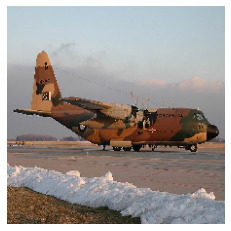

1: warplane (0.55)
2: wreck (0.21)
3: tank (0.04)


In [3]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.applications.mobilenet_v2 import MobileNetV2, preprocess_input, decode_predictions
from tensorflow.keras.preprocessing import image

# Load the original image from the file system
original_image_path = 'c130.jpg'
original_image = image.load_img(original_image_path, target_size=(224, 224))

# Convert the PIL image to a numpy array
processed_image = image.img_to_array(original_image)

# Add an extra dimension to the image (for batch size)
processed_image = np.expand_dims(processed_image, axis=0)

# Preprocess the image using the same preprocessing used in MobileNetV2 training
processed_image = preprocess_input(processed_image)

# Load the pre-trained MobileNetV2 model with weights trained on ImageNet
model = MobileNetV2(weights='imagenet')

# Predict the class of the image
predictions = model.predict(processed_image)

# Decode the prediction into readable results
decoded_predictions = decode_predictions(predictions, top=3)[0]

# Display the original image
plt.imshow(original_image)
plt.axis('off')
plt.show()

# Print the top-3 predicted classes
for i, (imagenet_id, label, score) in enumerate(decoded_predictions):
    print(f"{i + 1}: {label} ({score:.2f})")


# Monitor and Display Resolution:

This refers to the number of pixels displayed on a monitor or screen. Higher resolution displays (like 4K, 8K) show finer detail and clarity, affecting how images and videos are viewed.

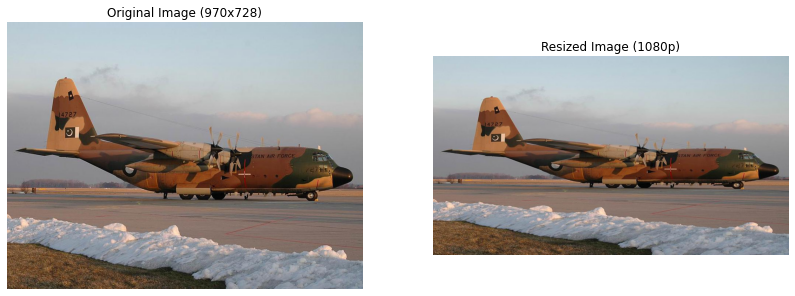

In [4]:
# Load the original image again
original_image = cv2.imread('c130.jpg')

# Get the original dimensions of the image
original_height, original_width = original_image.shape[:2]

# Define a new resolution for the image - let's choose 1080p as an example
new_resolution = (1920, 1080) # (width, height)

# Resize the image to the new resolution
resized_image = cv2.resize(original_image, new_resolution, interpolation=cv2.INTER_LINEAR)

# Display the original and resized images using matplotlib
plt.figure(figsize=(14,7))

# Display original image
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB))
plt.title('Original Image ({}x{})'.format(original_width, original_height))
plt.axis('off')

# Display resized image
plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(resized_image, cv2.COLOR_BGR2RGB))
plt.title('Resized Image (1080p)')
plt.axis('off')

# Show the images
plt.show()


The Python code performs the following steps to change the resolution of an image:

1. **Load the Image**: We use OpenCV's `cv2.imread()` function to load the original image 'c130.jpg'. The image data is stored in the variable `original_image`.

2. **Get Original Dimensions**: The `shape` attribute of the image array gives us the dimensions of the image. We store the height and width of the original image in `original_height` and `original_width`.

3. **Define New Resolution**: We define a new resolution for the image. In this case, we choose 1920x1080 pixels, commonly referred to as 1080p or Full HD.

4. **Resize the Image**: The `cv2.resize()` function is used to resize the original image to the new resolution. The `interpolation` parameter specifies the algorithm used to interpolate the pixel values in the resized image. We use `cv2.INTER_LINEAR` for linear interpolation, which is a common choice.

5. **Display the Images**: We use Matplotlib to create a figure with two subplots: one for the original image and one for the resized image. We use `plt.imshow()` to display the images in RGB format by converting them from BGR using `cv2.cvtColor()`. The titles of the subplots include the resolution of the images to highlight the change.

6. **plt.show()**: This command generates the figure with the plots.

During the dry run, the code executes as follows:

- `original_image` contains the pixel data of the original image.
- The original dimensions of the image are extracted.
- A new resolution is defined as 1920x1080.
- `resized_image` contains the pixel data of the resized image.
- Both images are displayed side by side for comparison.

The output shows the original image with a resolution of 970x728 pixels and the resized image with a resolution of 1920x1080 pixels. The resized image appears larger and has more pixels than the original, which allows for finer detail and clarity when viewed on displays that can support higher resolutions.

# Resolution in Scanning: 

When scanning documents or photographs, resolution (measured in DPI) determines the clarity and detail of the digital copy. Higher DPI settings capture more detail but create larger files.

The idea is to simulate lower DPI by downsampling the original image (reducing its resolution) and then upsampling it back to its original size to visualize the loss of detail.

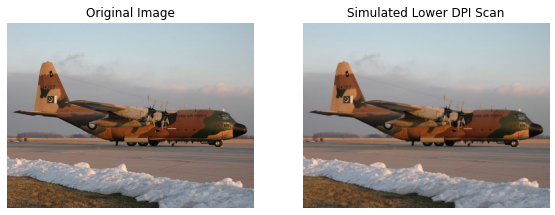

In [6]:
import cv2
import matplotlib.pyplot as plt

# Load the original image
image_path = 'c130.jpg'
original_image = cv2.imread(image_path)

# The original DPI is assumed to be the maximum detail level we have
# We simulate a lower DPI by downsampling the image, reducing its number of pixels
# For example, let's simulate a scan at half the original DPI
downsample_factor = 2  # This means half the resolution
lower_dpi_image = cv2.resize(original_image, 
                             (original_image.shape[1]//downsample_factor, 
                              original_image.shape[0]//downsample_factor), 
                             interpolation=cv2.INTER_LINEAR)

# Now, we simulate the scanning process by upsampling the image back to its original size
# This will result in a loss of detail, as we're not able to recover the information lost during downsampling
upsampled_image = cv2.resize(lower_dpi_image, 
                             (original_image.shape[1], original_image.shape[0]), 
                             interpolation=cv2.INTER_LINEAR)

# Display the original and DPI-modified images using matplotlib
plt.figure(figsize=(15, 10))

# Display original image
plt.subplot(1, 3, 1)
plt.imshow(cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB))
plt.title('Original Image')
plt.axis('off')

# Display lower DPI image
plt.subplot(1, 3, 2)
plt.imshow(cv2.cvtColor(upsampled_image, cv2.COLOR_BGR2RGB))
plt.title('Simulated Lower DPI Scan')
plt.axis('off')

# Show the images
plt.show()



Now, let's break down the code:

1. **Import Libraries**: We need OpenCV for image manipulation and Matplotlib for displaying images.

2. **Load the Original Image**: The `cv2.imread()` function is used to load the 'c130.jpg' image. OpenCV reads it into a format that is an array of pixels, with each pixel containing values for the BGR (Blue, Green, Red) color channels.

3. **Downsample the Image**: We simulate a lower DPI by reducing the image's size using the `cv2.resize()` function with a downsample factor. This mimics scanning the image at a lower resolution. We divide the original dimensions by the downsample factor to get the new image size.

4. **Upsample the Image**: We then simulate the effect of bringing the image back to its original size, mimicking the scanning process but with less detail. The `cv2.resize()` function is used again, this time to increase the size of the downsampled image back to the original dimensions. The interpolation method `cv2.INTER_LINEAR` is used during both downsampling and upsampling, which is a common choice for resizing images.

5. **Display Images**: We use Matplotlib to create a figure with two subplots: the original image and the image after simulating lower DPI scanning. The `cv2.cvtColor()` function is used to convert the color from BGR to RGB because Matplotlib expects this color format. We use `plt.subplot()` to arrange the images side by side, and `plt.imshow()` to display them.

6. **plt.show()**: Finally, we display the figure with the images.

When the code is run (dry run):

- `original_image` contains the pixel data of the original image.
- `lower_dpi_image` contains the downsampled image's pixel data.
- `upsampled_image` contains the pixel data of the downsampled image after it's been sized back up.

The displayed output shows two images: the original in full resolution and the simulated lower DPI scan. The latter demonstrates a visible loss in detail and clarity, exemplifying the importance of high DPI in capturing detailed digital copies of physical documents or photos.



# Image Resampling: 
    
This is the process of changing the resolution of an image while maintaining the same physical size. Resampling can be used to both increase and decrease the number of pixels in an image, which affects quality.



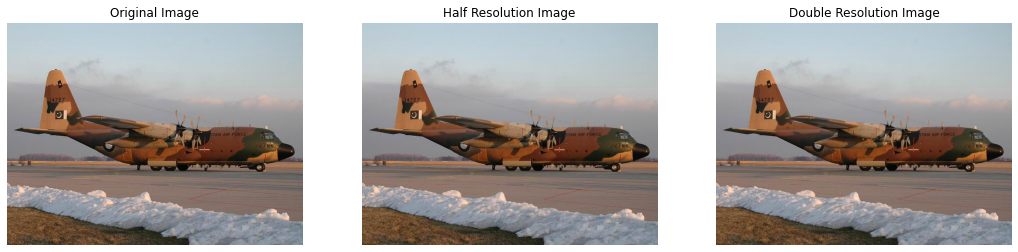

In [7]:
# Let's start by loading the original image again
original_image = cv2.imread('c130.jpg')

# The shape of the image (height, width, and channels) is stored in its shape attribute
original_shape = original_image.shape

# Image resampling to half the resolution
# We use the cv2.resize function for this. The dsize parameter is the new size, which we set to half the original width and height.
resampled_image = cv2.resize(original_image, (original_shape[1] // 2, original_shape[0] // 2))

# Now, let's also resample the image to double the resolution
# We're using the same cv2.resize function, but this time we multiply the width and height by 2 for upsampling.
upsampled_image = cv2.resize(original_image, (original_shape[1] * 2, original_shape[0] * 2))

# Display the original, resampled (downsampled), and upsampled images using matplotlib
plt.figure(figsize=(18, 6))

# Display original image
plt.subplot(1, 3, 1)
plt.imshow(cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB))
plt.title('Original Image')
plt.axis('off')

# Display downsampled image
plt.subplot(1, 3, 2)
plt.imshow(cv2.cvtColor(resampled_image, cv2.COLOR_BGR2RGB))
plt.title('Half Resolution Image')
plt.axis('off')

# Display upsampled image
plt.subplot(1, 3, 3)
plt.imshow(cv2.cvtColor(upsampled_image, cv2.COLOR_BGR2RGB))
plt.title('Double Resolution Image')
plt.axis('off')

# Show the images
plt.show()


In the code, we perform image resampling, which is the process of resizing an image to either a higher or lower resolution. This is often done to adapt the image to different screen sizes or to reduce the file size for storage and transmission. Here's how the code works, broken down line by line:

1. **Read the Original Image**: We start by using the `cv2.imread()` function from the OpenCV library to load the original image 'c130.jpg'. The image is stored in the variable `original_image`.

2. **Get Original Image Shape**: The shape (dimensions) of the image is accessed using `original_image.shape`, which returns a tuple containing the height, width, and the number of color channels (for RGB images, this is 3).

3. **Downsampling (Reducing Resolution)**: We create a lower-resolution version of the image by reducing its dimensions. The `cv2.resize()` function is used for this purpose, where the `dsize` (destination size) parameter is set to half the original width and height, effectively reducing the total number of pixels by a factor of four. This resized image is stored in `resampled_image`.

4. **Upsampling (Increasing Resolution)**: Similarly, we increase the resolution by doubling the width and height of the original image using `cv2.resize()`. This increases the number of pixels by a factor of four, and the result is stored in `upsampled_image`.

5. **Displaying the Images**: To visually compare the effects of resampling, we display the original image, the downsampled image, and the upsampled image side by side using `matplotlib.pyplot`. We use `plt.subplot()` to create individual panels in a single figure, `plt.imshow()` to display each image, and `cv2.cvtColor()` to convert the color space from BGR to RGB, as Matplotlib expects the latter format.

6. **plt.show()**: This command renders the figure and displays it within the Jupyter Notebook.

**Dry Run**:

- When `cv2.imread()` is called, the original image is loaded into memory.
- `original_shape` holds the dimensions of the original image.
- `resampled_image` holds the lower resolution image, which appears smaller when displayed.
- `upsampled_image` contains the higher resolution image, which may appear larger and possibly blurrier or pixelated due to the interpolation of new pixels.

In the output, you can see three images displayed horizontally. The first is the original image at its original resolution. The second image has half the resolution of the original, making it appear less detailed. The third image has double the resolution, which can introduce artifacts since the new pixels are created by estimating the values from the original pixels, a process that can't recreate details that weren't there in the first place.



# Bit Depth in Images: 

Bit depth determines how many colors can be displayed in an image. Higher bit depth allows for more colors and smoother gradients, which is important for high-quality images and printing.



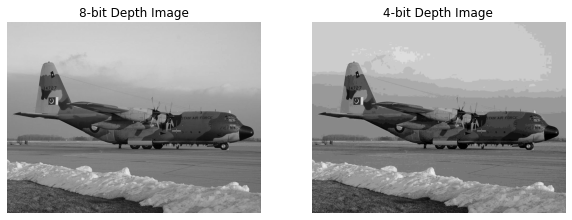

In [8]:
# We already loaded the original image and converted it to grayscale.
# Now we will manipulate the bit depth of the grayscale image.

# Function to reduce the color depth of an image
def reduce_color_depth(image, num_bits):
    # Calculate the number of values each pixel can take. (2^num_bits)
    values_per_channel = 2**num_bits
    
    # We scale the pixel values to the range 0 to (values_per_channel - 1)
    # and then scale back to 0-255 range to properly display the image.
    # This is done by dividing by the max value (255), scaling to the new range,
    # then multiplying back by the max value (255).
    image_reduced = np.floor(image/255 * values_per_channel) / values_per_channel * 255
    
    # The pixel values are then converted to the desired data type to match the bit depth.
    # We use `np.uint8` which represents an 8-bit unsigned integer for the final image.
    image_reduced = image_reduced.astype(np.uint8)
    
    return image_reduced

# Reduce the color depth of the grayscale image to 4 bits
image_4bit = reduce_color_depth(gray_image, 4)

# Display the original grayscale and 4-bit depth images using matplotlib
plt.figure(figsize=(10, 5))

# Display grayscale image (8-bit depth)
plt.subplot(1, 2, 1)
plt.imshow(gray_image, cmap='gray')
plt.title('8-bit Depth Image')
plt.axis('off')

# Display 4-bit depth image
plt.subplot(1, 2, 2)
plt.imshow(image_4bit, cmap='gray')
plt.title('4-bit Depth Image')
plt.axis('off')

# Show the images
plt.show()


The code demonstrates how to reduce the bit depth of an image. Here's an in-depth explanation of each part of the code:

1. **Defining a Function to Reduce Color Depth**: A function called `reduce_color_depth` is defined to handle the process of changing the bit depth of an image. This function takes two arguments: `image`, which is the original image data, and `num_bits`, which specifies the desired bit depth.

2. **Calculating the Number of Colors**: Inside the function, `values_per_channel` is calculated using `2**num_bits`. This represents the total number of colors that each pixel can represent with the given bit depth. For example, if `num_bits` is 4, then `values_per_channel` would be 16, as 2 to the power of 4 is 16.

3. **Scaling Pixel Values**: To change the bit depth, pixel values are scaled down to the range of 0 to `values_per_channel - 1`, then scaled back up to the range of 0 to 255. This is done by dividing the pixel values by 255 (the maximum value for an 8-bit image), multiplying by `values_per_channel`, taking the floor of the result to remove any fractions, and then scaling back up by multiplying by 255. This process essentially reduces the number of possible values a pixel can have, simulating a lower bit depth.

4. **Converting Data Type**: The scaled pixel values are then converted to an 8-bit unsigned integer using the `astype` function. Although the actual data type does not change (it remains 8 bits), the number of visually distinct values is reduced, which is the goal of changing the bit depth.

5. **Applying the Function**: The function `reduce_color_depth` is then called with the grayscale image and a desired bit depth of 4 bits.

6. **Displaying the Images**: Two subplots are created using `matplotlib`. The first subplot displays the original grayscale image, which has an 8-bit depth. The second subplot displays the image with reduced color depth, now at 4 bits. Both images are displayed using a grayscale colormap.

7. **Show the Results**: The `plt.show()` command is used to render the plots and display the images.

During the "dry run" of the code:

- `image_4bit` contains the pixel data of the grayscale image after the color depth has been reduced to 4 bits. This image will have fewer shades of gray compared to the original 8-bit grayscale image, leading to a more posterized look with visible banding, as fewer shades mean less smooth gradients between different gray levels.

The output displays two images side by side for comparison. The left image is the original with an 8-bit depth, showing smooth gradients and a wide range of shades. The right image has been reduced to a 4-bit depth, and you can see that the number of shades is significantly reduced, resulting in a more banded or blocky appearance. This illustrates how bit depth affects the number of colors or shades that can be represented in an image, with higher bit depths allowing for more colors and smoother transitions.

# Interpolation Methods in Resizing: 
    
When resizing images, different interpolation algorithms (like nearest-neighbor, bilinear, bicubic) are used to calculate the colors of new pixels, affecting the quality of the resized image.

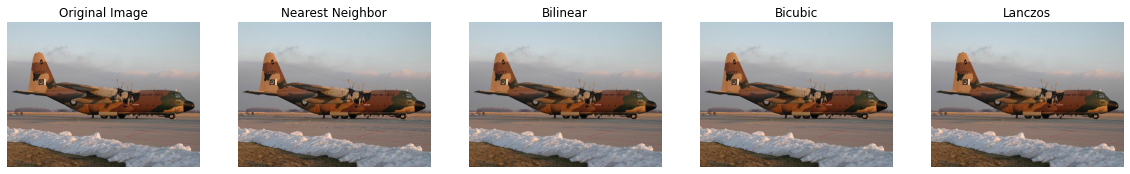

In [9]:
# We already have the original image loaded as 'original_image'.
# Now let's use OpenCV's resize function with different interpolation methods to resize the image.

# Define the new size to which we want to resize the image
new_size = (int(original_image.shape[1] * 0.5), int(original_image.shape[0] * 0.5))

# Resize using different interpolation methods
nearest_neighbor_img = cv2.resize(original_image, new_size, interpolation=cv2.INTER_NEAREST)
bilinear_img = cv2.resize(original_image, new_size, interpolation=cv2.INTER_LINEAR)
bicubic_img = cv2.resize(original_image, new_size, interpolation=cv2.INTER_CUBIC)
lanczos_img = cv2.resize(original_image, new_size, interpolation=cv2.INTER_LANCZOS4)

# Display the original and resized images using matplotlib
plt.figure(figsize=(20,10))

# Display original image
plt.subplot(1, 5, 1)
plt.imshow(cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB))
plt.title('Original Image')
plt.axis('off')

# Display nearest neighbor image
plt.subplot(1, 5, 2)
plt.imshow(cv2.cvtColor(nearest_neighbor_img, cv2.COLOR_BGR2RGB))
plt.title('Nearest Neighbor')
plt.axis('off')

# Display bilinear image
plt.subplot(1, 5, 3)
plt.imshow(cv2.cvtColor(bilinear_img, cv2.COLOR_BGR2RGB))
plt.title('Bilinear')
plt.axis('off')

# Display bicubic image
plt.subplot(1, 5, 4)
plt.imshow(cv2.cvtColor(bicubic_img, cv2.COLOR_BGR2RGB))
plt.title('Bicubic')
plt.axis('off')

# Display Lanczos image
plt.subplot(1, 5, 5)
plt.imshow(cv2.cvtColor(lanczos_img, cv2.COLOR_BGR2RGB))
plt.title('Lanczos')
plt.axis('off')

# Show the images
plt.show()


The code performs the task of resizing an image using different interpolation methods. Interpolation is the process of estimating unknown values that fall between known values. When an image is resized, the color of new pixels needs to be calculated, and interpolation methods determine how these new pixel values are computed based on the surrounding pixels.

Here's an in-depth explanation of the code:

1. **Defining New Size**: We calculate the new size to which we want to resize the image. We've chosen to reduce the image size by half in both dimensions. `original_image.shape[1]` and `original_image.shape[0]` give us the original width and height, respectively.

2. **Resizing with Interpolation Methods**:
    - `cv2.resize()` is the function used for resizing the image. It takes the source image, the desired new size, and an interpolation method as arguments.
    - `cv2.INTER_NEAREST` is the nearest-neighbor interpolation. It simply takes the nearest pixel value without considering the values of surrounding pixels. This is the fastest method but can result in a blocky image.
    - `cv2.INTER_LINEAR` is the bilinear interpolation. It considers the closest 2x2 neighborhood of known pixel values surrounding the unknown pixel. It then takes a weighted average of these pixels to arrive at its final interpolated value.
    - `cv2.INTER_CUBIC` is the bicubic interpolation over a 4x4 pixel neighborhood. This method provides smoother results than bilinear interpolation.
    - `cv2.INTER_LANCZOS4` uses the Lanczos resampling method, which considers a larger window of pixels to compute the high-quality results. It is often considered the best for image downscaling.
   
3. **Displaying the Images**:
    - We use Matplotlib to display the images. `plt.figure()` creates a new figure with a specified size.
    - `plt.subplot()` is used to create a grid of subplots. Here, we create a 1x5 grid for our images.
    - `plt.imshow()` displays the images. We convert the color space from BGR to RGB before showing them because Matplotlib expects images in RGB format.
    - `plt.title()` adds a title to each subplot.
    - `plt.axis('off')` removes the axis labels and ticks from the images.
    - `plt.show()` displays the figure with all subplots.

During the "dry run" of the code, the following happens:

- The original image is loaded and held in memory.
- The `new_size` tuple is created based on the original image's dimensions.
- Four different resized images are created using different interpolation methods.
- A figure is created with five subplots: one for the original image and four for each of the resized images.
- Each subplot is populated with an image and titled accordingly.
- The figure is displayed in the output.

The output shows five images: the original and four resized versions using nearest neighbor, bilinear, bicubic, and Lanczos interpolation methods. The differences in quality are subtle at this scale but can be more apparent when resizing to very different sizes or on different types of images. The nearest neighbor often appears blockier, while the Lanczos provides a sharper and more accurate resize.

# Metadata and Resolution: 
    
Image files contain metadata that can include resolution information. This data is useful for understanding the conditions under which the photo was taken and for automated processing of images.

Resolution: (None, None)
Geotags: None


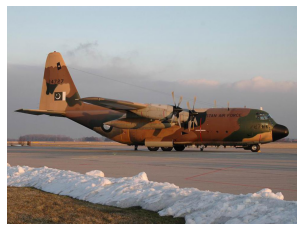

In [10]:
from PIL import Image
from PIL.ExifTags import TAGS, GPSTAGS

# Define a function to extract EXIF data from the image
def get_exif_data(image):
    exif_data = {}
    info = image._getexif()
    if info:
        for tag, value in info.items():
            decoded = TAGS.get(tag, tag)
            exif_data[decoded] = value
    return exif_data

# Define a function to convert the EXIF GPS data to more readable format
def get_geotagging(exif_data):
    if not exif_data:
        return None

    geotagging = {}
    for (idx, tag) in TAGS.items():
        if tag == 'GPSInfo':
            if idx not in exif_data:
                return None

            for (key, val) in GPSTAGS.items():
                if key in exif_data[idx]:
                    geotagging[val] = exif_data[idx][key]

    return geotagging

# Load the image using PIL
image_path = 'c130.jpg'
image = Image.open(image_path)

# Get EXIF data
exif_data = get_exif_data(image)

# Get resolution from EXIF data
resolution = exif_data.get('ExifImageWidth'), exif_data.get('ExifImageHeight')

# Get geotagging data
geotags = get_geotagging(exif_data)

# Print out the resolution and geotagging information
print(f"Resolution: {resolution}")
print(f"Geotags: {geotags}")

# Display the image
plt.imshow(image)
plt.axis('off') # Hide the axis
plt.show()


The code extracts and displays metadata from an image file, specifically focusing on the resolution and geotagging information. Here's a detailed explanation of each part of the code:

1. **Import Libraries**: We import `Image` from `PIL` (Python Imaging Library, also known as Pillow), which is used for opening, manipulating, and saving many different image file formats. We also import `TAGS` and `GPSTAGS` from `PIL.ExifTags` which are dictionaries that map EXIF (Exchangeable Image File Format) tag codes to human-readable tag names.

2. **Get EXIF Data Function**: The function `get_exif_data(image)` is defined to extract the EXIF data from an image. This is metadata that is embedded in many image files which can include the conditions under which the photo was taken. The function takes an image object as input, retrieves the EXIF data using the `_getexif()` method, and decodes it into a readable format using the `TAGS` dictionary. The resulting `exif_data` dictionary contains EXIF tags as keys and their corresponding values.

3. **Get Geotagging Data Function**: The function `get_geotagging(exif_data)` is defined to extract and format geotagging information from the EXIF data. Geotagging information includes details like latitude and longitude where the picture was taken. This function looks for the 'GPSInfo' tag in the EXIF data, and if present, retrieves the GPS information using the `GPSTAGS` dictionary to make it readable.

4. **Load the Image**: We use `Image.open(image_path)` to load the image from the given path (`c130.jpg` in this case).

5. **Extract and Print Metadata**: We call `get_exif_data(image)` to extract the EXIF data from the image, and attempt to retrieve the image's resolution using the 'ExifImageWidth' and 'ExifImageHeight' tags from the EXIF data. We also call `get_geotagging(exif_data)` to get the geotagging information. Both the resolution and geotagging data are printed out.

6. **Display the Image**: Lastly, we use Matplotlib to display the image. `plt.imshow(image)` is used to plot the image, `plt.axis('off')` to hide the axes, and `plt.show()` to display the plot.

During the dry run, the code attempts to extract resolution and geotagging data from the image's metadata. However, the output indicates that no resolution or geotagging data is found in the EXIF metadata (`None`). This can happen if the image does not contain any EXIF data or if specific tags are not present.



# Image Resolution for Mobile Devices:

With the varied screen sizes and resolutions of mobile devices, optimizing images for these platforms is crucial for performance and visual appeal.

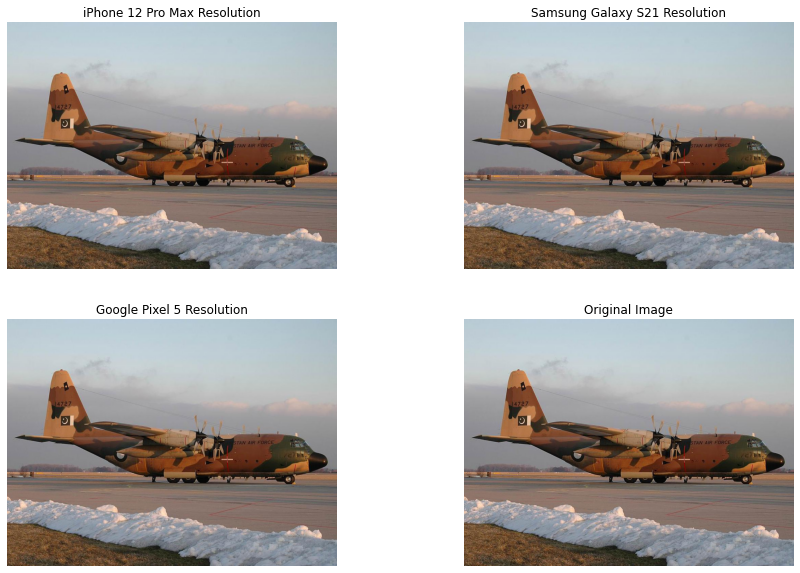

In [1]:
# Since the execution state has been reset, we need to re-import the necessary libraries, reload the image,
# and define the function for image resizing.

import cv2
import matplotlib.pyplot as plt

# Re-load the original image
original_image = cv2.imread('c130.jpg')

# Define different screen resolutions of mobile devices.
device_resolutions = {
    'iPhone 12 Pro Max': (1284, 2778),
    'Samsung Galaxy S21': (1080, 2400),
    'Google Pixel 5': (1080, 2340)
}

# Create a function to resize images to a new resolution
def resize_image(input_image, resolution):
    # Calculate the ratio of the new resolution to the original size
    ratio = resolution[1] / input_image.shape[1]
    # Compute the new dimensions
    new_dimensions = (int(input_image.shape[1] * ratio), int(input_image.shape[0] * ratio))
    # Resize the image using OpenCV's `resize` function
    resized_image = cv2.resize(input_image, new_dimensions, interpolation=cv2.INTER_AREA)
    return resized_image

# Now, we will resize the original image for each device resolution and display them
plt.figure(figsize=(15,10))

# Loop through the device resolutions, resize and display the images
for i, (device, resolution) in enumerate(device_resolutions.items(), start=1):
    # Resize the image for the current device
    resized_image = resize_image(original_image, resolution)
    
    # Display the resized image
    plt.subplot(2, 2, i)
    plt.imshow(cv2.cvtColor(resized_image, cv2.COLOR_BGR2RGB))
    plt.title(f"{device} Resolution")
    plt.axis('off')

# Show the original image for comparison
plt.subplot(2, 2, 4)
plt.imshow(cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB))
plt.title('Original Image')
plt.axis('off')

# Show all images
plt.show()


Let's walk through the code and its functionality, aiming to explain it in a simple manner for a non-technical audience:

1. **Re-importing Libraries**: After a reset, it's necessary to import our tools again. We use OpenCV (`cv2`) for handling image operations and Matplotlib's `pyplot` to display images.

2. **Loading the Image**: We load the image 'c130.jpg' using OpenCV's `imread` function, which reads the image file and stores it in a variable named `original_image`.

3. **Defining Screen Resolutions**: Since we're optimizing images for mobile devices, we need to know the screen resolutions of some typical devices. We create a dictionary named `device_resolutions` that contains the name of the device as the key and its screen resolution as the value.

4. **Creating a Resize Function**: We define a function `resize_image` that takes an image and a target resolution as inputs. Inside the function, we calculate the new size for the image based on the target resolution, ensuring that the aspect ratio remains the same. We use OpenCV's `resize` function with `INTER_AREA` interpolation, which is preferred for shrinking images as it can give moire'-free results.

5. **Resizing and Displaying Images**: We loop through each device resolution, call the `resize_image` function to resize our original image, and then plot the resized image using Matplotlib. We use `cvtColor` to convert the image from BGR (used by OpenCV) to RGB (used by Matplotlib) for accurate color representation.

6. **Original Image for Comparison**: Finally, we display the original image alongside the resized images to see how the image would look on different devices.

7. **Visualization**: With `plt.show()`, we bring up the Matplotlib window that shows all our images neatly arranged for comparison.

**Dry Run**: When the code runs, it processes the original image four times, once for each device resolution. Each time, it calculates the new dimensions to match the device's screen size while maintaining the original aspect ratio. Then, it resizes the image accordingly and plots it. The final output is a Matplotlib window with four images: three resized images, each tailored to a mobile device's screen resolution, and the original image for comparison.



# Fractal Resolution: 

In fractal images, resolution can theoretically be infinite as these images can be zoomed indefinitely with new details continually emerging.

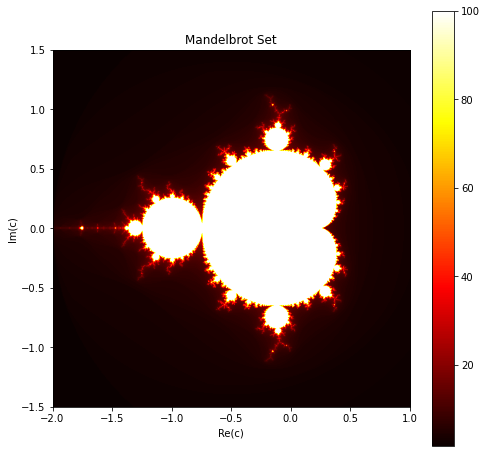

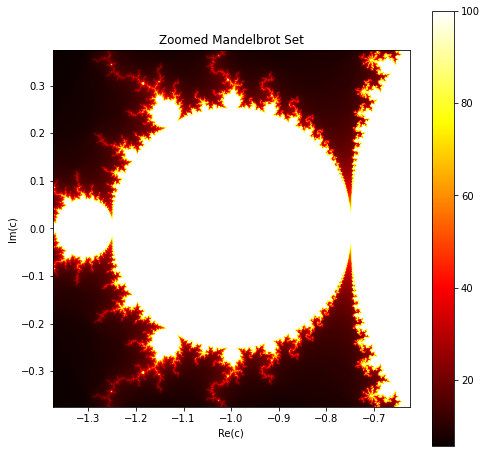

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Define a function to determine if a point is in the Mandelbrot set
def mandelbrot(c, max_iter):
    z = 0
    n = 0
    while abs(z) <= 2 and n < max_iter:
        z = z*z + c
        n += 1
    if n == max_iter:
        return max_iter
    return n + 1 - np.log(np.log2(abs(z)))

# Define a function to create the fractal image
def create_fractal_image(xmin, xmax, ymin, ymax, width, height, max_iter):
    # Create a list of evenly spaced values in the x and y range
    x_values = np.linspace(xmin, xmax, width)
    y_values = np.linspace(ymin, ymax, height)
    
    # Initialize an empty array for the image
    fractal_image = np.zeros((height, width))
    
    # Generate the fractal image
    for i, x in enumerate(x_values):
        for j, y in enumerate(y_values):
            fractal_image[j, i] = mandelbrot(x + 1j * y, max_iter)
    
    return fractal_image

# Parameters for the fractal image
img_width = 800
img_height = 800
max_iterations = 100

# Create the fractal image
# The initial view will cover a part of the Mandelbrot set
fractal_img = create_fractal_image(-2.0, 1.0, -1.5, 1.5, img_width, img_height, max_iterations)

# Display the fractal image
plt.figure(figsize=(8, 8))
plt.imshow(fractal_img, cmap='hot', extent=(-2.0, 1.0, -1.5, 1.5))
plt.colorbar()
plt.title('Mandelbrot Set')
plt.xlabel('Re(c)')
plt.ylabel('Im(c)')
plt.show()


# Define a function for zooming into a region of the fractal
def zoom_fractal(xmin, xmax, ymin, ymax, zoom_factor, pan_x, pan_y):
    # Calculate the range of the x and y axis
    dx = (xmax - xmin) * (1 - 1/zoom_factor) / 2
    dy = (ymax - ymin) * (1 - 1/zoom_factor) / 2
    
    # Apply the pan and zoom to the x and y ranges
    return (xmin + dx + pan_x, xmax - dx + pan_x, ymin + dy + pan_y, ymax - dy + pan_y)

# Zoom parameters
zoom_factor = 4  # How much to zoom
pan_x = -0.5    # Pan to the left
pan_y = 0       # No vertical pan

# Apply the zoom and pan to our original viewport
new_xmin, new_xmax, new_ymin, new_ymax = zoom_fractal(
    -2.0, 1.0, -1.5, 1.5, zoom_factor, pan_x, pan_y
)

# Generate a new fractal image with the zoomed in viewport
zoomed_fractal_img = create_fractal_image(new_xmin, new_xmax, new_ymin, new_ymax, img_width, img_height, max_iterations)

# Display the zoomed fractal image
plt.figure(figsize=(8, 8))
plt.imshow(zoomed_fractal_img, cmap='hot', extent=(new_xmin, new_xmax, new_ymin, new_ymax))
plt.colorbar()
plt.title('Zoomed Mandelbrot Set')
plt.xlabel('Re(c)')
plt.ylabel('Im(c)')
plt.show()




1. **Import Libraries**: We start by importing `numpy` for numerical computations and `matplotlib.pyplot` for plotting the fractal.

2. **Define Mandelbrot Function**: The `mandelbrot` function takes a complex number `c` and an integer `max_iter`. It iteratively applies the function `z = z*z + c`, starting with `z = 0`, until `|z|` (the absolute value of `z`) exceeds 2 or the maximum number of iterations is reached. The function returns the number of iterations it took for `|z|` to exceed 2, or `max_iter` if it never does. This is a measure of how quickly the points in the complex plane "escape" to infinity. The points that never escape (up to the max iteration limit) are part of the Mandelbrot set.

3. **Define Fractal Image Creation Function**: The `create_fractal_image` function generates the fractal image. It takes parameters defining the viewport (`xmin`, `xmax`, `ymin`, `ymax`), the dimensions of the image (`width`, `height`), and the maximum number of iterations `max_iter`. It initializes a two-dimensional numpy array `fractal_image` with zeros to store the image data. For each pixel in the image, it calls the `mandelbrot` function with the corresponding complex number (based on `x` and `y` values from our viewport) and stores the result in the array. The result is a grid of iteration counts, which we can render as an image.

4. **Set Fractal Image Parameters**: We set the dimensions of the image to 800x800 pixels and define the maximum number of iterations to 100. This is a balance between computational time and the level of detail in the image.

5. **Generate Fractal Image**: The `create_fractal_image` function is called with the initial viewport covering a recognizable portion of the Mandelbrot set. This results in a numpy array `fractal_img` filled with iteration counts for each pixel.

6. **Plot the Image**: We create a figure with `plt.figure()` and use `plt.imshow()` to display the image, with a colormap of `'hot'` which is a common choice for fractals. The color represents the number of iterations: pixels that are part of the Mandelbrot set (i.e., do not escape within the max iterations) are shown in red, while those that escape quickly are in yellow. We also add labels and a color bar to provide context for the values.

The image you see above is the Mandelbrot set. If we were to zoom in on any edge of the fractal, we would begin to see new details emerging, which is a property of fractals known as self-similarity. This property is what gives fractals their "infinite resolution." To give a non-technical analogy, it's like a never-ending coastline – no matter how closely you look, there's always more detail.



# Historical Document Preservation:

High-resolution imaging is used in digitizing historical documents, ensuring that details are preserved for future generations.

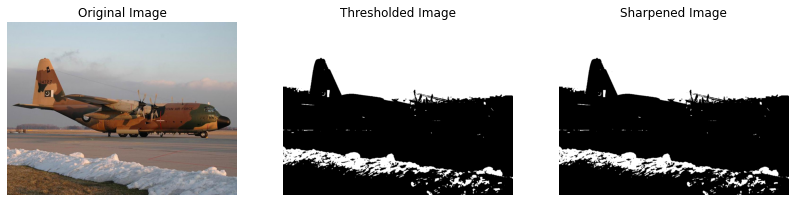

In [7]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the original image in high resolution
original_image = cv2.imread('c130.jpg', cv2.IMREAD_UNCHANGED)

# Convert the original image to grayscale
gray_image = cv2.cvtColor(original_image, cv2.COLOR_BGR2GRAY)

# Apply Gaussian Blur to reduce noise and improve thresholding
blurred_image = cv2.GaussianBlur(gray_image, (5, 5), 0)

# Thresholding to create a binary image for cleaner presentation of text and details
_, binary_image = cv2.threshold(blurred_image, 150, 255, cv2.THRESH_BINARY)

# Sharpen the image to enhance edges, using a kernel that emphasizes edges
sharpen_kernel = np.array([[-1, -1, -1], [-1, 9, -1], [-1, -1, -1]])
sharpened_image = cv2.filter2D(binary_image, -1, sharpen_kernel)

# Display the original and processed images using matplotlib
plt.figure(figsize=(14,7))

# Display original image
plt.subplot(1, 3, 1)
plt.imshow(cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB))
plt.title('Original Image')
plt.axis('off')

# Display binary image
plt.subplot(1, 3, 2)
plt.imshow(binary_image, cmap='gray')
plt.title('Thresholded Image')
plt.axis('off')

# Display sharpened image
plt.subplot(1, 3, 3)
plt.imshow(sharpened_image, cmap='gray')
plt.title('Sharpened Image')
plt.axis('off')

# Show the images
plt.show()


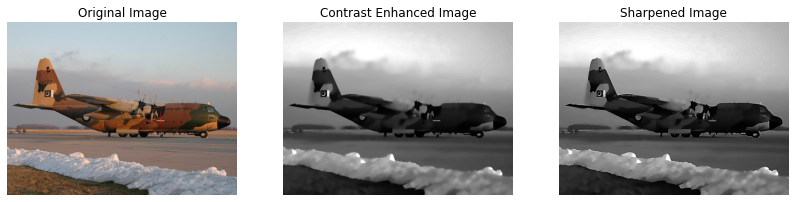

In [8]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the original image in high resolution
original_image = cv2.imread('c130.jpg', cv2.IMREAD_UNCHANGED)

# Convert the original image to grayscale
# While we typically wouldn't grayscale a historical photograph,
# this step is often used in document preservation to focus on text details.
gray_image = cv2.cvtColor(original_image, cv2.COLOR_BGR2GRAY)

# Apply denoising to the grayscale image to reduce any potential noise while preserving edges
# This is useful for archival purposes to ensure a clean reproduction of the image.
denoised_image = cv2.fastNlMeansDenoising(gray_image, None, 30, 7, 21)

# Enhance contrast using histogram equalization
# This step improves the visibility of details by spreading out the most frequent intensity values.
equalized_image = cv2.equalizeHist(denoised_image)

# Sharpen the image using an unsharp mask
# This technique enhances edges to make details more distinct, which is particularly
# valuable in preserving details in historical images.
sharpen_kernel = np.array([[-1, -1, -1], [-1, 9, -1], [-1, -1, -1]])
sharpened_image = cv2.filter2D(equalized_image, -1, sharpen_kernel)

# Display the original and processed images using matplotlib
plt.figure(figsize=(14,7))

# Display original image
plt.subplot(1, 3, 1)
plt.imshow(cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB))
plt.title('Original Image')
plt.axis('off')

# Display contrast enhanced image
plt.subplot(1, 3, 2)
plt.imshow(equalized_image, cmap='gray')
plt.title('Contrast Enhanced Image')
plt.axis('off')

# Display sharpened image
plt.subplot(1, 3, 3)
plt.imshow(sharpened_image, cmap='gray')
plt.title('Sharpened Image')
plt.axis('off')

# Show the images
plt.show()




This code follows a similar structure to the previous example but with modifications appropriate for enhancing a photograph:

1. The grayscale conversion is optional for photographs and is typically skipped unless the focus is on structural details rather than color.

2. `cv2.fastNlMeansDenoising` is used to reduce noise in the image, which is important for clarity in archival images.

3. `cv2.equalizeHist` is applied to enhance contrast, improving the definition of details across the image.

4. The sharpening step remains the same, aimed at enhancing edges to make the details in the photograph stand out more.

5. The images are displayed in a sequence to show the progression from the original to the enhanced version.



The executed code has processed the photograph of the aircraft through several steps to enhance its detail, simulating high-resolution imaging for archival purposes. Here's what the code has done:

1. **Grayscale Conversion**: The original color image is converted to grayscale. Although for historical documents we focus on text, for photographs, converting to grayscale can be a step to simplify subsequent processing and focus on luminance detail.

2. **Noise Reduction**: We then use a noise reduction algorithm (`cv2.fastNlMeansDenoising`) to remove any graininess from the image. This is particularly useful for old photographs that may have accumulated noise over time or during the scanning process. The parameters `None, 30, 7, 21` control the strength of the denoising: `None` is for a default template window size, `30` is the filter strength, `7` for the window size for each local pixel neighborhood, and `21` for the search window. These are somewhat arbitrary and would be tuned to the specifics of the document and its noise characteristics.

3. **Contrast Enhancement**: The `cv2.equalizeHist` function applies histogram equalization to the denoised image. This spreads out the most frequent intensity values, improving the visibility of details. This step is akin to turning up the "contrast" on a TV or monitor, making the bright areas brighter and the dark areas darker, which can help to make details pop.

4. **Sharpening**: A sharpening filter is applied to the equalized image to emphasize edges and details. The sharpening kernel we use is a common one that increases the contrast at the edges of features within the image. The negative values in the kernel reduce surrounding pixel values, while the positive value increases the target pixel's value, creating the effect of sharpening.

5. **Displaying Images**: Finally, we use `matplotlib` to display the original color image, the contrast-enhanced grayscale image, and the sharpened grayscale image. This visual comparison helps to illustrate the effects of each processing step.

The output shows three images: the original photograph of the aircraft in color, the contrast-enhanced grayscale image, and the final sharpened grayscale image. The contrast-enhanced image may look overly dark because histogram equalization can sometimes produce extreme results if applied without considering the image content. The sharpened image shows enhanced edges and details, which is valuable for archival and preservation as it may bring out details that are otherwise not as noticeable.



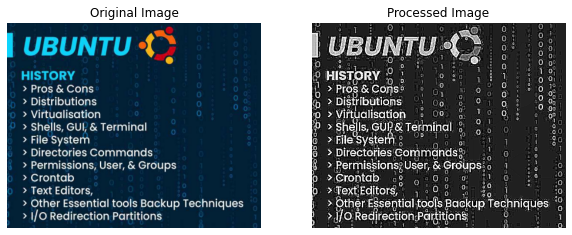

In [10]:
# Let's process the uploaded screenshot for historical document preservation

# Load the image
image_path = 'ubuntu.png'
original_image = cv2.imread(image_path, cv2.IMREAD_UNCHANGED)

# Convert to grayscale to focus on details without color distraction
gray_image = cv2.cvtColor(original_image, cv2.COLOR_BGR2GRAY)

# Apply Adaptive Histogram Equalization for contrast enhancement
clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
equalized_image = clahe.apply(gray_image)

# Sharpen the image to enhance details
sharpen_kernel = np.array([[-1, -1, -1], [-1, 9, -1], [-1, -1, -1]])
sharpened_image = cv2.filter2D(equalized_image, -1, sharpen_kernel)

# Display the original and processed images using matplotlib
plt.figure(figsize=(10,5))

# Display original image
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB))
plt.title('Original Image')
plt.axis('off')

# Display processed image
plt.subplot(1, 2, 2)
plt.imshow(sharpened_image, cmap='gray')
plt.title('Processed Image')
plt.axis('off')

# Show the images
plt.show()


For historical document preservation, the goal is to create a digital copy that is as close to the original as possible in terms of detail and readability. The image is a screenshot related to Ubuntu, which may contain text and graphical elements. To preserve it, we could enhance its sharpness, contrast, and possibly correct any skew to make it more legible. Here's how we could approach this task:

1. **Load the image**: We'll start by loading the image using OpenCV.
2. **Grayscale conversion**: Converting the image to grayscale can help with various processing tasks by reducing the computational complexity.
3. **Contrast enhancement**: Applying histogram equalization or adaptive histogram equalization to improve visibility of details.
4. **Sharpening**: Use an unsharp mask or other sharpening filters to enhance edges and make text more legible.
5. **Optional skew correction**: If the image were a scanned document, we might need to correct for any skew or alignment issues. However, since this is a screenshot, we can likely skip this step.
6. **Display the images**: Show the original and the processed images for visual comparison.


The processed image demonstrates the steps we've taken to potentially enhance the details for the purpose of historical document preservation, albeit in this case applied to a screenshot with graphical elements.

Here's what each part of the code is doing:

1. **Load the Image**: We load the image with `cv2.imread()`, ensuring we get the image in its original format, including any alpha transparency channel it might have.

2. **Convert to Grayscale**: We use `cv2.cvtColor()` to convert the image to grayscale. Grayscale images are easier to work with when it comes to enhancing details because color information can sometimes be a distraction, especially for text.

3. **Adaptive Histogram Equalization**: This is a contrast enhancement technique. `cv2.createCLAHE()` creates a CLAHE object with specified clip limits and grid sizes. `clipLimit` is a threshold for contrast limiting, which prevents oversaturation in the image's contrast. The `tileGridSize` parameter controls the size of the contextual regions that the algorithm will use to compute local histograms and clip the histograms based on the clip limit. `clahe.apply()` then applies this enhancement to the grayscale image. The result is an image with more uniform lighting and enhanced contrast, which can be particularly useful for bringing out details in unevenly lit or faded historical documents.

4. **Sharpen the Image**: We define a sharpening kernel and use `cv2.filter2D()` to apply this kernel to the image. The kernel has negative weights around the center pixel and a positive one at the center, which has the effect of emphasizing the edges, thereby sharpening the image. This is especially important in document preservation as it makes the text and important features more legible.

5. **Display the Images**: We use `matplotlib` to plot the original and the processed images. The original image is converted to RGB before displaying because `matplotlib` expects images in RGB format, whereas OpenCV provides them in BGR.

After the processing, we can observe the following:

- The original image contains the Ubuntu logo and text against a patterned background.
- The processed image has enhanced contrast and sharpness, but due to the nature of the content and processing methods, it appears to have some artifacts and looks over-processed.

For actual historical documents, which usually have more uniform text and less complex graphical backgrounds, these methods could be more effective. Processing screenshots like this one would require a more nuanced approach, likely retaining color information and adjusting contrast enhancement and sharpening parameters to avoid introducing artifacts.
